In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


pd.set_option('display.max_columns', None)

In [4]:
# Load the dataset
df = pd.read_csv("data.csv") 

# Display basic structure
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (1041, 23)


,name,role,skin_type,power_level,weight,height,age,eye_color,gender,hair_color,speed,universe,body_type,job,battle_iq,species,ranking,intelligence,abilities,training_time,special_attack,secret_code,win_prob
0,Manhunter,H3ro,Transparent,2140.0,99.0,177.0,121.0,Yellow,NaN,Bald,827.0,Marvel Comics,Giant,Brewer,582.0,Saiyan,3889.0,582.0,Mind Reading,1353.0,Electric Nova,10111.0,0.43
1,Neon Netrunner,Hero,Transparent,1437.0,119.0,260.0,94.0,Yellow,1.0,Brown,1151.0,Marvel,Athletic,Hero,927.0,Alien,3003.0,875.0,Time Manipulation,767.0,Fireburst Cannon,10111.0,0.32
2,Kakashi,H3ro,Transparent,8843.0,581.0,788.0,118.0,Yellow,2.0,Brown,870.0,Marvel,Regular,Scientist,909.0,Giant,4829.0,858.0,Super Strength,3895.0,Water Vortex,10111.0,0.63
3,Valiant Templar,Hero,Metallic,15966.0,83.0,175.0,91.0,NaN,1.0,NaN,NaN,Marvel,Fat,Demon Lord,1136.0,Undead,1517.0,1033.0,Flying,8874.0,Grass Tempest,10011.0,0.52
4,Mon-El,H3ro,Luminescent,6039.0,90.0,195.0,22.0,NaN,2.0,Purple,NaN,Marvel Comics,Muscular,Warrior,1222.0,Kryptonian,3602.0,1111.0,Super Speed,3454.0,Water Fury,11111.0,0.80


In [5]:
df['role'].value_counts()

role
Villain    292
Hero       288
H3ro       133
VIllain    126
HerO       100
VillaIn     97
Name: count, dtype: int64

In [6]:
# Replace inconsistent 'role' values
df['role'] = df['role'].replace({
    'VIllain': 'Villain',
    'VillaIn': 'Villain',
    'H3ro': 'Hero',
    'HerO': 'Hero'
})

In [7]:
df['role'].value_counts()

role
Hero       521
Villain    515
Name: count, dtype: int64

In [8]:
df['special_attack'].value_counts()

special_attack
Grass Surge         117
Electric Nova       103
Fire Fist            95
Eternal Firewave     94
Water Fury           90
Water Vortex         89
Electric Surge       84
Fireburst Cannon     76
Grass Tempest        76
Grass blade          75
Electric Storm       70
Water Gun            67
Name: count, dtype: int64

In [9]:
df['abilities'].value_counts()

abilities
Super Strength       186
Flying               178
Super Speed          177
Teleportation        173
Time Manipulation    163
Mind Reading         159
Name: count, dtype: int64

In [10]:
df['species'].value_counts()

species
Saiyan        173
Kryptonian    173
Undead        169
Alien         168
Giant         167
Human         161
Name: count, dtype: int64

In [11]:
df['job'].value_counts()

job
Scientist      87
Drunken        77
Mage           76
Demon Lord     75
Brewer         73
Hero           73
Cult Leader    73
Saviors        72
Leader         71
Thief          70
God            64
Warrior        62
Arcanist       59
Captain        59
Assassin       45
Name: count, dtype: int64

In [12]:
df['hair_color'].value_counts()

hair_color
Blonde       95
Purple       93
Fire-like    92
Brown        91
Bald         87
Black        87
Green        83
Gold         82
Pink         79
White        77
Silver       74
Name: count, dtype: int64

In [13]:
df['eye_color'].value_counts()

eye_color
Black      96
White      76
Blood      72
Blue       72
Yellow     69
Red        69
Green      66
Glowing    63
Pink       61
Brown      60
Name: count, dtype: int64

In [14]:
df['gender'].value_counts()

gender
2.0    351
1.0    273
0.0    241
Name: count, dtype: int64

In [15]:
df['body_type'].value_counts()

body_type
Giant       249
Athletic    208
Regular     179
Muscular    164
Slim         85
Fat          80
Normal       71
Name: count, dtype: int64

In [16]:
df['skin_type'].value_counts()

skin_type
Steel          125
Scaly          116
Draconish      107
Transparent    105
Hairy          105
Stone          104
Metallic       103
Luminescent     94
Normal          91
Wooden          86
Name: count, dtype: int64

In [17]:
df['universe'].value_counts()

universe
Anime            210
Fantasy Realm    206
Cyberverse       203
Marvel Comics    105
Marvel           104
DC Comics        104
DC               104
Name: count, dtype: int64

In [18]:
# Check data types and missing values
df.info()

# Check missing values
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1036 non-null   object 
 1   role            1036 non-null   object 
 2   skin_type       1036 non-null   object 
 3   power_level     977 non-null    float64
 4   weight          969 non-null    float64
 5   height          1023 non-null   float64
 6   age             1036 non-null   float64
 7   eye_color       704 non-null    object 
 8   gender          865 non-null    float64
 9   hair_color      940 non-null    object 
 10  speed           758 non-null    float64
 11  universe        1036 non-null   object 
 12  body_type       1036 non-null   object 
 13  job             1036 non-null   object 
 14  battle_iq       1036 non-null   float64
 15  species         1011 non-null   object 
 16  ranking         1036 non-null   float64
 17  intelligence    965 non-null    f

secret_code       388
eye_color         337
speed             283
gender            176
hair_color        101
training_time      96
intelligence       76
weight             72
power_level        64
species            30
height             18
name                5
special_attack      5
abilities           5
ranking             5
universe            5
battle_iq           5
job                 5
body_type           5
role                5
age                 5
skin_type           5
win_prob            5
dtype: int64

# 1. Handling Missing Values of Categorical Variables 

## Handling missing values of 'name'

In [20]:
# Filter rows where 'name' is missing (NaN)
missing_name_rows = df[df['name'].isnull()]
missing_name_rows

,name,role,skin_type,power_level,weight,height,age,eye_color,gender,hair_color,speed,universe,body_type,job,battle_iq,species,ranking,intelligence,abilities,training_time,special_attack,secret_code,win_prob
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Droping these rows since all the columns contain NaN values

In [22]:
# Drop rows where 'name' is missing
df = df[df['name'].notnull()]

## Chi-square test to find the categorical variables with relationships

In [24]:
# Get non-numerical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['name', 'role', 'skin_type', 'eye_color', 'hair_color', 'universe', 'body_type', 'job', 'species', 'abilities', 'special_attack']


In [25]:
chi2_results = []

# Loop over all unique pairs of categorical columns
for col1, col2 in combinations(categorical_cols, 2):
    contingency = pd.crosstab(df[col1], df[col2])
    
    # Skip pairs with too many missing or low counts
    if contingency.shape[0] < 2 or contingency.shape[1] < 2:
        continue
    
    try:
        chi2, p, dof, expected = chi2_contingency(contingency)
        chi2_results.append((col1, col2, p))
    except ValueError:
        continue  # in case of a singular matrix or other issue

In [26]:
# Sort by p-value (lower = stronger relationship)
chi2_results_sorted = sorted(chi2_results, key=lambda x: x[2])

# Display top 10 relationships with lowest p-values
print("Top relationships between categorical variables (lowest p-values):")
for col1, col2, p in chi2_results_sorted[:10]:
    print(f"{col1} vs {col2} → p-value = {p:.8f}")

Top relationships between categorical variables (lowest p-values):
skin_type vs eye_color → p-value = 0.00000000
body_type vs species → p-value = 0.00000000
name vs job → p-value = 0.00007515
name vs special_attack → p-value = 0.00037361
role vs abilities → p-value = 0.00120234
name vs skin_type → p-value = 0.00131920
name vs hair_color → p-value = 0.00147687
name vs universe → p-value = 0.00277267
name vs body_type → p-value = 0.00557704
name vs eye_color → p-value = 0.00834470


## Handling missing values of 'eye_color'

In [28]:
# Create cross-tabulation tables
# Eye color vs Skin Type
skin_eye_ct = pd.crosstab(df['skin_type'], df['eye_color'])
print(skin_eye_ct)

eye_color    Black  Blood  Blue  Brown  Glowing  Green  Pink  Red  White  \
skin_type                                                                  
Draconish        0      0     0      0        0      0     0    0     76   
Hairy            0     72     0      0        0      0     0    0      0   
Luminescent      0      0     0      0       63      0     0    0      0   
Metallic         0      0     0      0        0     66     0    0      0   
Normal           0      0     0     60        0      0     0    0      0   
Scaly            0      0    72      0        0      0     0    0      0   
Steel           96      0     0      0        0      0     0    0      0   
Stone            0      0     0      0        0      0     0   69      0   
Transparent      0      0     0      0        0      0     0    0      0   
Wooden           0      0     0      0        0      0    61    0      0   

eye_color    Yellow  
skin_type            
Draconish         0  
Hairy             0  

In [29]:
skin_eye_map = {
    'Draconish': 'White',
    'Hairy': 'Blood',
    'Luminescent': 'Glowing',
    'Metallic': 'Green',
    'Normal': 'Brown',
    'Scaly': 'Blue',
    'Steel': 'Black',
    'Stone': 'Red',
    'Transparent': 'Yellow',
    'Wooden': 'Pink'
}

#Create a Series that maps skin_type to eye_color where eye_color is missing
mapped_eyes = df['skin_type'].map(skin_eye_map)

# Fill only where eye_color is NaN
df['eye_color'] = df['eye_color'].fillna(mapped_eyes)

## Handling missing values of 'species' 

In [31]:
# Create cross-tabulation tables
# body_type vs species
bt_species_ct = pd.crosstab(df['body_type'], df['species'])
print(bt_species_ct)

species    Alien  Giant  Human  Kryptonian  Saiyan  Undead
body_type                                                 
Athletic      40      0     35          71      56       0
Fat            0      0     28           0       0      50
Giant         44     92      0          52      57       0
Muscular      48      0      0          50      60       0
Normal        36      0     33           0       0       0
Regular        0     75     32           0       0      67
Slim           0      0     33           0       0      52


based on the cross-tabulation table, there is a very strong and clear relationship between body_type and species.

- Athletic → Dominated by Kryptonian (71) and Saiyan (56)
- Fat → Mostly Human (28) and Undead (50)
- Giant → High counts of Giant (92), Saiyan (57), Alien (44)
- Muscular → Mostly Saiyan (60), Alien (48), Kryptonian (50)
- Regular → Mostly Giant (75) and Undead (67)
- Slim → Mostly Undead (52) and Human (33)

Each body_type tends to co-occur with only a few dominant species, which makes it a very good candidate for inferring missing species. Therefore, impute missing species values using the most common species for each body_type.

In [33]:
# Create a mapping from body_type to most common species
body_species_map = df.groupby('body_type')['species'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan
)

# Fill missing species using body_type mapping
df['species'] = df['species'].fillna(df['body_type'].map(body_species_map))

## Handling missing values of 'hair_color'

In [35]:
# Filter rows where 'hair_color' is missing (NaN)
missing_hc_rows = df[df['hair_color'].isnull()]
missing_hc_rows

,name,role,skin_type,power_level,weight,height,age,eye_color,gender,hair_color,speed,universe,body_type,job,battle_iq,species,ranking,intelligence,abilities,training_time,special_attack,secret_code,win_prob
3,Valiant Templar,Hero,Metallic,15966.0,83.0,175.0,91.0,Green,1.0,NaN,NaN,Marvel,Fat,Demon Lord,1136.0,Undead,1517.0,1033.0,Flying,8874.0,Grass Tempest,10011.0,0.52
14,Hyperion,Hero,Wooden,NaN,NaN,154.0,143.0,Pink,1.0,NaN,760.0,Marvel Comics,Regular,Leader,1135.0,Undead,925.0,1032.0,Time Manipulation,312.0,Grass Surge,11010.0,0.58
33,Valiant Templar,Hero,Metallic,15966.0,83.0,175.0,91.0,Green,1.0,NaN,NaN,Marvel,Fat,Demon Lord,1136.0,Undead,1517.0,1033.0,Flying,8874.0,Grass Tempest,10011.0,0.52
38,Augmented Shadowcaster,Hero,Normal,13307.0,50.0,176.0,42.0,Brown,1.0,NaN,2387.0,Marvel,Regular,Warrior,1164.0,Undead,4538.0,1059.0,Teleportation,9479.0,Fire Fist,10000.0,0.51
42,Rockslide,Hero,Luminescent,14851.0,82.0,149.0,73.0,Glowing,2.0,NaN,NaN,Marvel Comics,Slim,Hero,1146.0,Undead,1547.0,1042.0,Time Manipulation,9544.0,Grass Tempest,11111.0,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Wicked Warlock,Villain,Stone,9157.0,680.0,766.0,83.0,Red,0.0,NaN,1246.0,Cyberverse,Giant,Thief,1214.0,Giant,4608.0,1104.0,Super Strength,7320.0,Water Gun,NaN,0.70
976,Surtur,Villain,Steel,7337.0,58.0,166.0,62.0,Black,1.0,NaN,1641.0,Cyberverse,Athletic,Saviors,1149.0,Human,1287.0,1045.0,Super Speed,4086.0,Electric Surge,11000.0,0.71
978,Baron Mordo,Villain,Hairy,10658.0,83.0,190.0,59.0,Blood,2.0,NaN,1721.0,Cyberverse,Slim,Captain,1140.0,Human,3617.0,1037.0,Teleportation,7846.0,Grass Surge,10010.0,0.85
999,Bane,Villain,Scaly,10013.0,536.0,768.0,26.0,Blue,2.0,NaN,3872.0,Cyberverse,Regular,Drunken,1151.0,Giant,3051.0,1047.0,Super Strength,6554.0,Grass Surge,10001.0,0.66


In [36]:
#filling all the NaN values in the 'hair_color' column with 'unknown'
df['hair_color'] = df['hair_color'].fillna('Unknown')

In [37]:
df.isnull().sum().sort_values(ascending=False)

secret_code       383
speed             278
gender            171
training_time      91
intelligence       71
weight             67
power_level        59
height             13
name                0
battle_iq           0
special_attack      0
abilities           0
ranking             0
species             0
universe            0
job                 0
body_type           0
role                0
hair_color          0
eye_color           0
age                 0
skin_type           0
win_prob            0
dtype: int64

# 2. Handling Outliers and Missing Values of Numerical Variables

In [39]:
# Get numerical columns
numerical_cols = df.select_dtypes(include='float64').columns.tolist()
print("Numerical columns:", numerical_cols)

Numerical columns: ['power_level', 'weight', 'height', 'age', 'gender', 'speed', 'battle_iq', 'ranking', 'intelligence', 'training_time', 'secret_code', 'win_prob']


In [40]:
percentage = df[numerical_cols].isnull().mean()
print(percentage*100)

power_level       5.694981
weight            6.467181
height            1.254826
age               0.000000
gender           16.505792
speed            26.833977
battle_iq         0.000000
ranking           0.000000
intelligence      6.853282
training_time     8.783784
secret_code      36.969112
win_prob          0.000000
dtype: float64


array([[<Axes: title={'center': 'power_level'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'speed'}>],
       [<Axes: title={'center': 'battle_iq'}>,
        <Axes: title={'center': 'ranking'}>,
        <Axes: title={'center': 'intelligence'}>],
       [<Axes: title={'center': 'training_time'}>,
        <Axes: title={'center': 'secret_code'}>,
        <Axes: title={'center': 'win_prob'}>]], dtype=object)

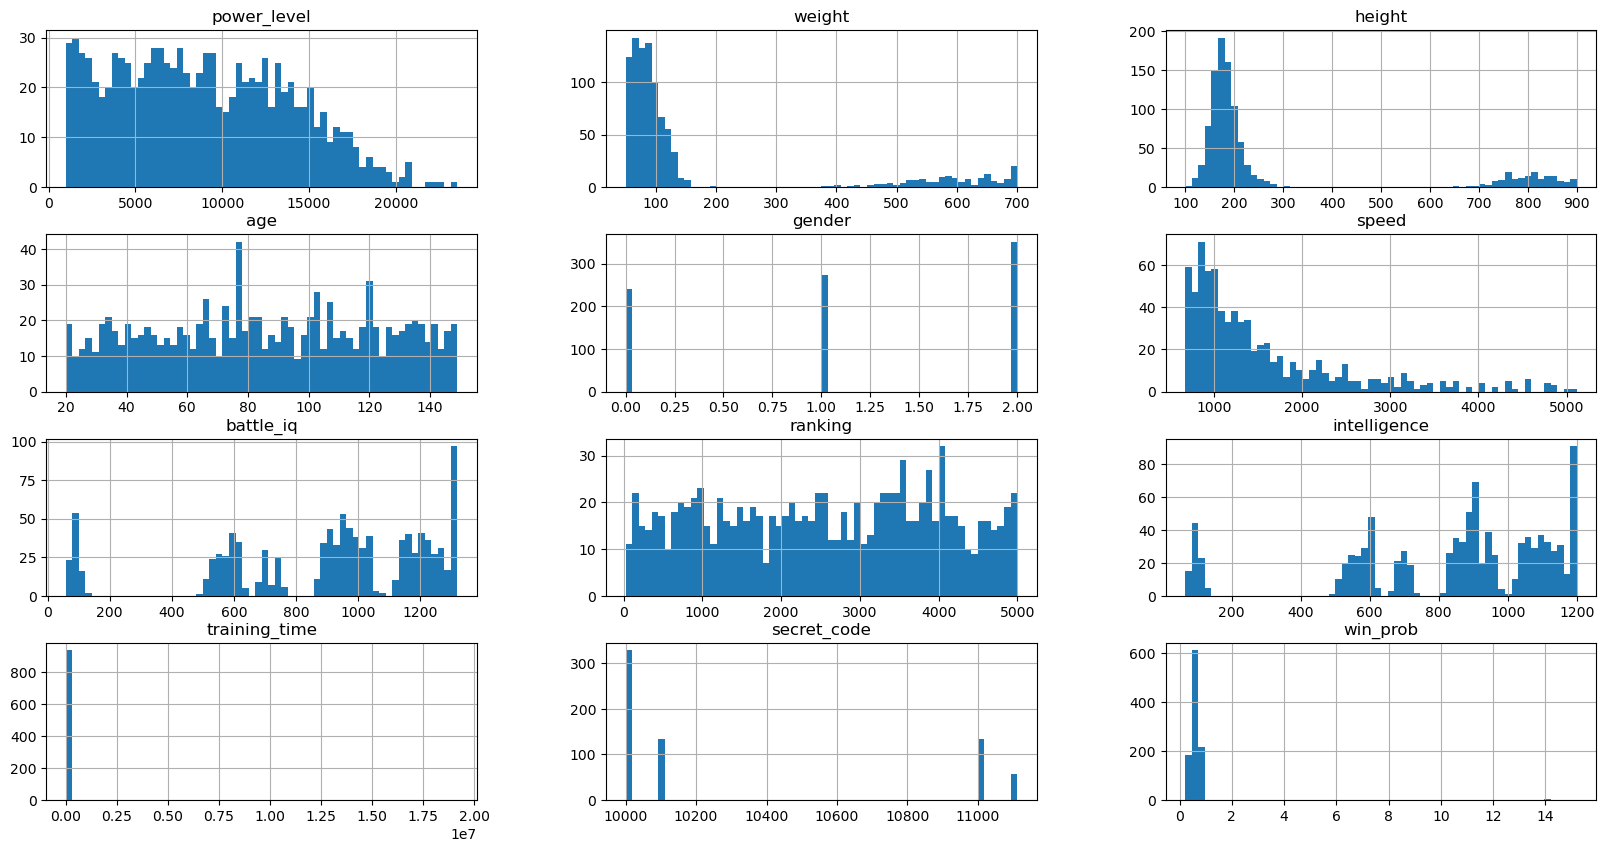

In [41]:
df.hist(bins=60, figsize=(20,10))

## Handling Outliers and Missing Values of 'speed' 

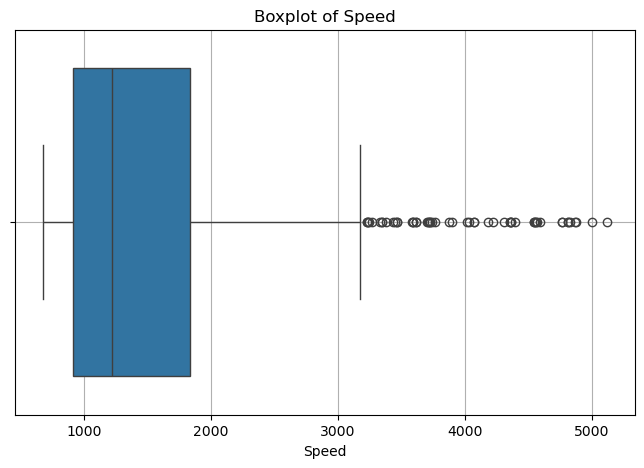

In [43]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['speed'])
plt.title('Boxplot of Speed')
plt.xlabel('Speed')
plt.grid(True)
plt.show()

In [44]:
df['speed'].describe()

count     758.000000
mean     1546.882586
std       912.156035
min       677.000000
25%       910.500000
50%      1220.500000
75%      1837.500000
max      5116.000000
Name: speed, dtype: float64

#### IQR-Based Capping

In [46]:
Q1 = df['speed'].quantile(0.25)
Q3 = df['speed'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count of outliers
outliers = df[(df['speed'] < lower_bound) | (df['speed'] > upper_bound)]
print(f"Outliers in 'speed': {len(outliers)}")

Outliers in 'speed': 54


In [47]:
# Capping
df['speed_iqr_capped'] = df['speed'].clip(lower=lower_bound, upper=upper_bound)

<Axes: ylabel='speed_iqr_capped'>

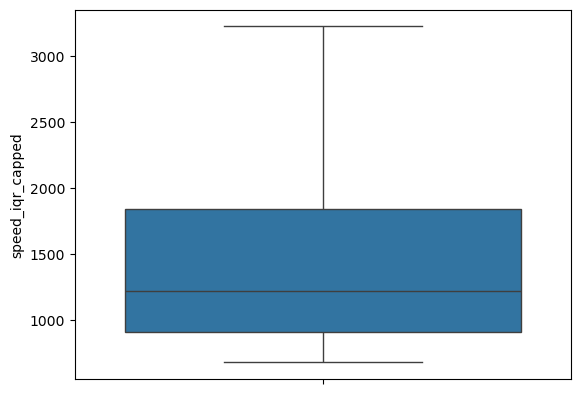

In [48]:
sns.boxplot(df['speed_iqr_capped'])

In [49]:
df['speed_iqr_capped'].describe()

count     758.000000
mean     1490.331135
std       755.859677
min       677.000000
25%       910.500000
50%      1220.500000
75%      1837.500000
max      3228.000000
Name: speed_iqr_capped, dtype: float64

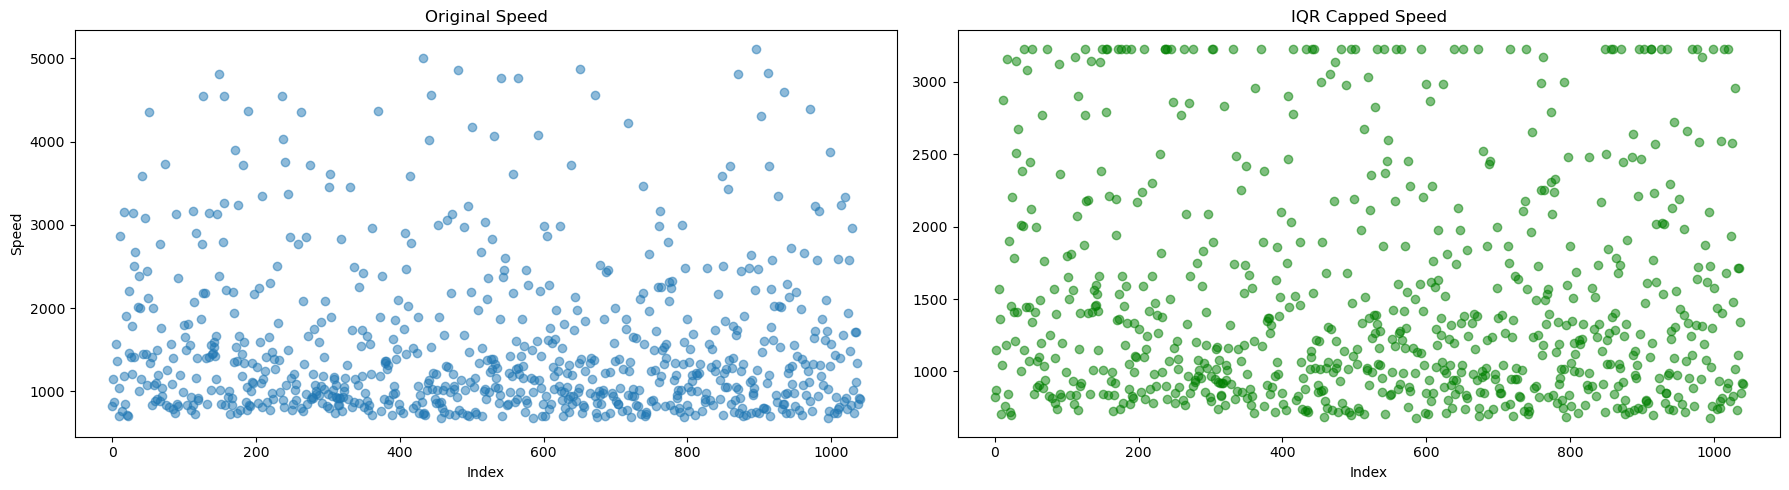

In [50]:
plt.figure(figsize=(18, 5))

# Original
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['speed'], alpha=0.5)
plt.title("Original Speed")
plt.xlabel("Index")
plt.ylabel("Speed")

# IQR Capped
plt.subplot(1, 2, 2)
plt.scatter(df.index, df['speed_iqr_capped'], alpha=0.5, color='green')
plt.title("IQR Capped Speed")
plt.xlabel("Index")

plt.tight_layout()
plt.show()

#### Handling Missing Values

use the overall median to impute speed.

**Why Median Is Better Here**

1. Highly Skewed Distribution

The large standard deviation and high outlier count suggest that the speed distribution is skewed and not normal. In such cases:
- The mean is pulled by outliers
- The median is robust to extreme values

2. Goal of Imputation

I am trying to fill in missing values without introducing bias. If I use the mean here, I’d risk overestimating speed due to outliers. The median preserves the core structure better.

In [52]:
df['speed'] = df['speed'].fillna(df['speed'].median())
df['speed_iqr_capped'] = df['speed_iqr_capped'].fillna(df['speed_iqr_capped'].median())

## Handling outliers and missing values of 'training_time'

In [54]:
df['training_time'].describe()

count    9.450000e+02
mean     1.377879e+05
std      1.304712e+06
min      1.200000e+01
25%      2.686000e+03
50%      4.987000e+03
75%      7.856000e+03
max      1.917800e+07
Name: training_time, dtype: float64

In [55]:
Q1 = df['training_time'].quantile(0.25)
Q3 = df['training_time'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['training_time'] < (Q1 - 1.5 * IQR)) | (df['training_time'] > (Q3 + 1.5 * IQR))).sum()
print("IQR outliers:", outliers)

IQR outliers: 11


<Axes: ylabel='training_time'>

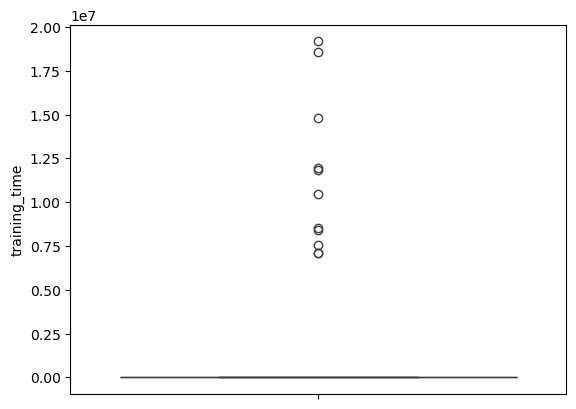

In [56]:
sns.boxplot(df['training_time'])

**Capping the outliers, Because:**

1. Severely Skewed Data
- Median = 4,987 vs Mean = 137,788 → a huge gap.
- That indicates that a few extreme values (outliers) are pulling the mean way up.

2. Models Could Be Misled
- Algorithms like linear regression, KNN, SVM can be heavily influenced by extreme values.
- Training time of 19 million could dominate the scale and lead to poor model performance.

3. Preserve All Data Points
- Capping allows you to keep all rows while minimizing distortion.

4. Only ~1% of Data Are Outliers
- With only 11 out of 945 non-null values being outliers, capping is a light-touch solution.

#### IQR-Based Capping

In [59]:
Q1 = df['training_time'].quantile(0.25)
Q3 = df['training_time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping
df['training_time_iqr_capped'] = df['training_time'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

In [60]:
df['training_time_iqr_capped'].describe()

count      945.000000
mean      5199.277249
std       3141.306836
min         12.000000
25%       2686.000000
50%       4987.000000
75%       7856.000000
max      15611.000000
Name: training_time_iqr_capped, dtype: float64

<Axes: ylabel='training_time_iqr_capped'>

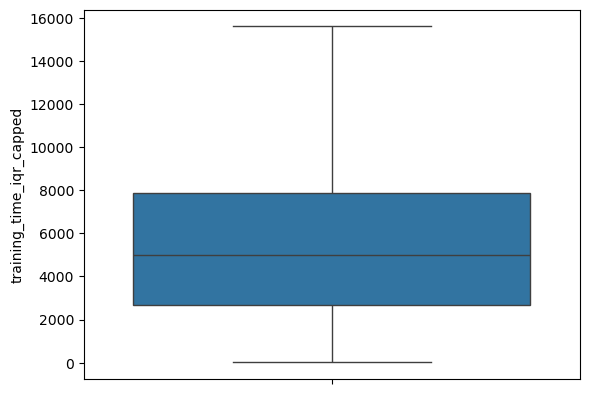

In [61]:
sns.boxplot(df['training_time_iqr_capped'])

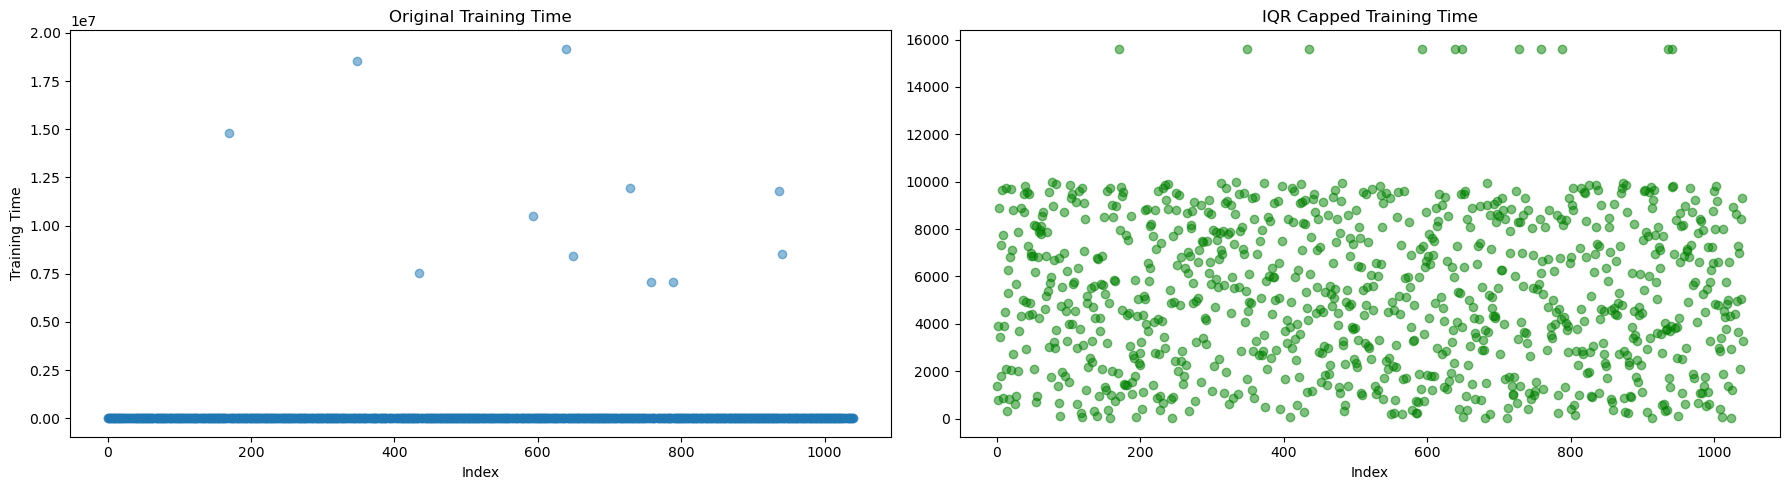

In [62]:
plt.figure(figsize=(18, 5))

# Original
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['training_time'], alpha=0.5)
plt.title("Original Training Time")
plt.xlabel("Index")
plt.ylabel("Training Time")

# IQR Capped
plt.subplot(1, 2, 2)
plt.scatter(df.index, df['training_time_iqr_capped'], alpha=0.5, color='green')
plt.title("IQR Capped Training Time")
plt.xlabel("Index")

plt.tight_layout()
plt.show()

IQR-basedcapping;

- preserved central tendency (median, Q1, Q3).
- eliminated extreme values (max capped to ~15k).

Distribution is now much tighter and usable for modeling.

Since the IQR-based approach seems statistically sound and aligns with the median-based filling:
- Use training_time_iqr_capped for the model.
- Fill the missing values using median:

#### Handling Missing Values

In [65]:
df['training_time'] = df['training_time'].fillna(df['training_time'].median())
df['training_time_iqr_capped'] = df['training_time_iqr_capped'].fillna(df['training_time_iqr_capped'].median())

## Handling Missing Values of 'height'

In [67]:
# Filter rows where 'height' is missing (NaN)
missing_height_rows = df[df['height'].isnull()]
missing_height_rows

,name,role,skin_type,power_level,weight,height,age,eye_color,gender,hair_color,speed,universe,body_type,job,battle_iq,species,ranking,intelligence,abilities,training_time,special_attack,secret_code,win_prob,speed_iqr_capped,training_time_iqr_capped
65,Wiccan,Hero,Scaly,7357.0,70.0,NaN,112.0,Blue,2.0,Pink,1220.5,Marvel,Normal,Captain,1010.0,Alien,2775.0,936.0,Teleportation,4987.0,Electric Storm,NaN,0.46,1220.5,4987.0
105,Holo,Hero,Draconish,17999.0,121.0,NaN,47.0,White,NaN,Green,1220.5,DC,Giant,God,592.0,Kryptonian,2679.0,592.0,Flying,9493.0,Electric Surge,10101.0,0.86,1220.5,9493.0
163,Blade,Hero,Draconish,6607.0,666.0,NaN,103.0,White,0.0,Black,999.0,DC,Giant,Arcanist,980.0,Giant,4842.0,908.0,Super Strength,5839.0,Grass blade,NaN,0.52,999.0,5839.0
193,Blade,Hero,Draconish,6607.0,666.0,NaN,103.0,White,0.0,Black,999.0,DC,Giant,Arcanist,980.0,Giant,4842.0,908.0,Super Strength,5839.0,Grass blade,NaN,0.52,999.0,5839.0
217,Cybernetic Netrunner,Hero,Scaly,11127.0,73.0,NaN,76.0,Blue,NaN,Brown,1220.5,Anime,Fat,Cult Leader,896.0,Human,3198.0,846.0,Super Strength,7690.0,Electric Surge,NaN,0.55,1220.5,7690.0
270,Radiant Cleric,Hero,Scaly,12525.0,640.0,NaN,36.0,Blue,2.0,Fire-like,2854.0,Anime,Regular,Assassin,1320.0,Giant,4222.0,1200.0,Time Manipulation,8044.0,Fireburst Cannon,10001.0,0.59,2854.0,8044.0
506,Cybernetic Defender,Hero,Wooden,10296.0,59.0,NaN,139.0,Pink,NaN,Blonde,725.0,Cyberverse,Fat,Scientist,105.0,Undead,4049.0,115.0,Super Speed,7642.0,Fire Fist,NaN,0.51,725.0,7642.0
586,Madame Masque,Villain,Stone,NaN,NaN,NaN,148.0,Red,1.0,White,677.0,Marvel Comics,Muscular,Leader,674.0,Kryptonian,958.0,661.0,Super Strength,235.0,Eternal Firewave,NaN,0.39,677.0,235.0
649,Faust VIII,Villain,Metallic,6634.0,553.0,NaN,75.0,Green,1.0,Blonde,1338.0,DC Comics,Giant,Saviors,108.0,Giant,3412.0,118.0,Super Speed,8420000.0,Water Fury,NaN,0.56,1338.0,15611.0
667,Onslaught,Villain,Hairy,NaN,71.0,NaN,107.0,Blood,0.0,Blonde,1220.5,DC Comics,Athletic,Thief,82.0,Human,3931.0,92.0,Super Speed,823.0,Grass Surge,NaN,0.46,1220.5,823.0


In [68]:
df['height'].describe()

count    1023.000000
mean      283.183773
std       234.115811
min       100.000000
25%       165.000000
50%       184.000000
75%       215.000000
max       900.000000
Name: height, dtype: float64

<Axes: ylabel='height'>

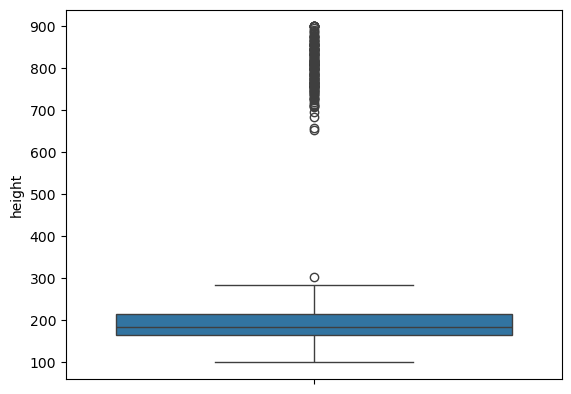

In [69]:
sns.boxplot(df['height'])

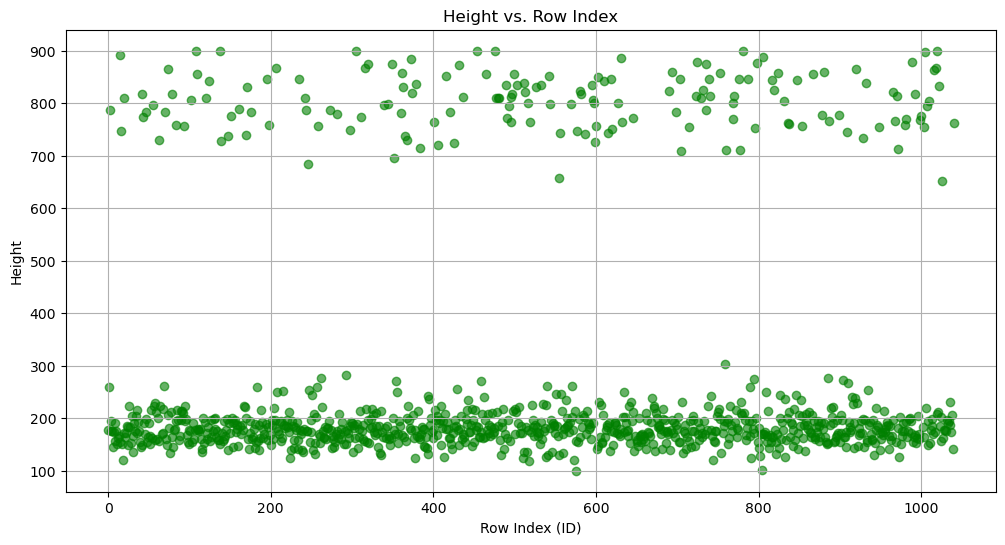

In [70]:
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['height'], alpha=0.6, color='green')
plt.title('Height vs. Row Index')
plt.xlabel('Row Index (ID)')
plt.ylabel('Height')
plt.grid(True)
plt.show()

Two Distinct Clusters
- Lower Cluster: Around 150–250 units 
- Upper Cluster: Around 800–900+ units 
- Within each cluster, the values seem consistently distributed, not randomly scattered.

Therefore, we should not impute missing height values using just the overall mean or median, because:
- There are two distinct height populations.
- Using the global median would misrepresent either group.

Recommendation: impute missing height values by grouping on a relevant categorical feature such as:
- species or
- body_type or
- role

#### Compare Height Spread Across Groups

We will analyze the standard deviation and interquartile range (IQR) of the `height` column grouped by different categorical features to find the best feature for imputing missing values.

In [72]:
def analyze_height_spread_by(group_col):
    grouped = df.groupby(group_col)['height']
    summary = grouped.agg(['count', 'mean', 'std', 'median', lambda x: x.quantile(0.75) - x.quantile(0.25)])
    summary.columns = ['Count', 'Mean', 'Std Dev', 'Median', 'IQR']
    summary = summary.sort_values(by='IQR')
    return summary

# Try different grouping options
species_spread = analyze_height_spread_by('species')
body_type_spread = analyze_height_spread_by('body_type')
role_spread = analyze_height_spread_by('role')

# Display top 5 for each
print("=== Height spread by Species ===")
display(species_spread.head())

print("\n=== Height spread by Body Type ===")
display(body_type_spread.head())

print("\n=== Height spread by Role ===")
display(role_spread.head())

=== Height spread by Species ===


,Count,Mean,Std Dev,Median,IQR
species,,,,,
Human,157,171.872611,14.817144,171.0,19.00
Undead,170,159.205882,19.659798,160.0,24.75
Kryptonian,177,184.887006,19.884287,187.0,26.00
Saiyan,178,181.943820,21.193944,180.0,28.75
Alien,169,201.964497,38.333265,198.0,49.00



=== Height spread by Body Type ===


,Count,Mean,Std Dev,Median,IQR
body_type,,,,,
Fat,78,164.064103,19.963824,164.0,23.50
Slim,84,162.952381,19.863938,164.0,25.25
Athletic,207,186.391304,26.607111,185.0,29.00
Muscular,162,187.148148,29.539577,185.5,35.00
Normal,69,185.797101,32.229225,176.0,43.00



=== Height spread by Role ===


,Count,Mean,Std Dev,Median,IQR
role,,,,,
Hero,514,277.949416,230.512653,182.0,49.0
Villain,509,288.469548,237.808742,186.0,53.0


#### Visualize Height Distribution per Group

Visualize the distribution of height values by different categorical features to visually assess which groups show the most consistent height patterns.

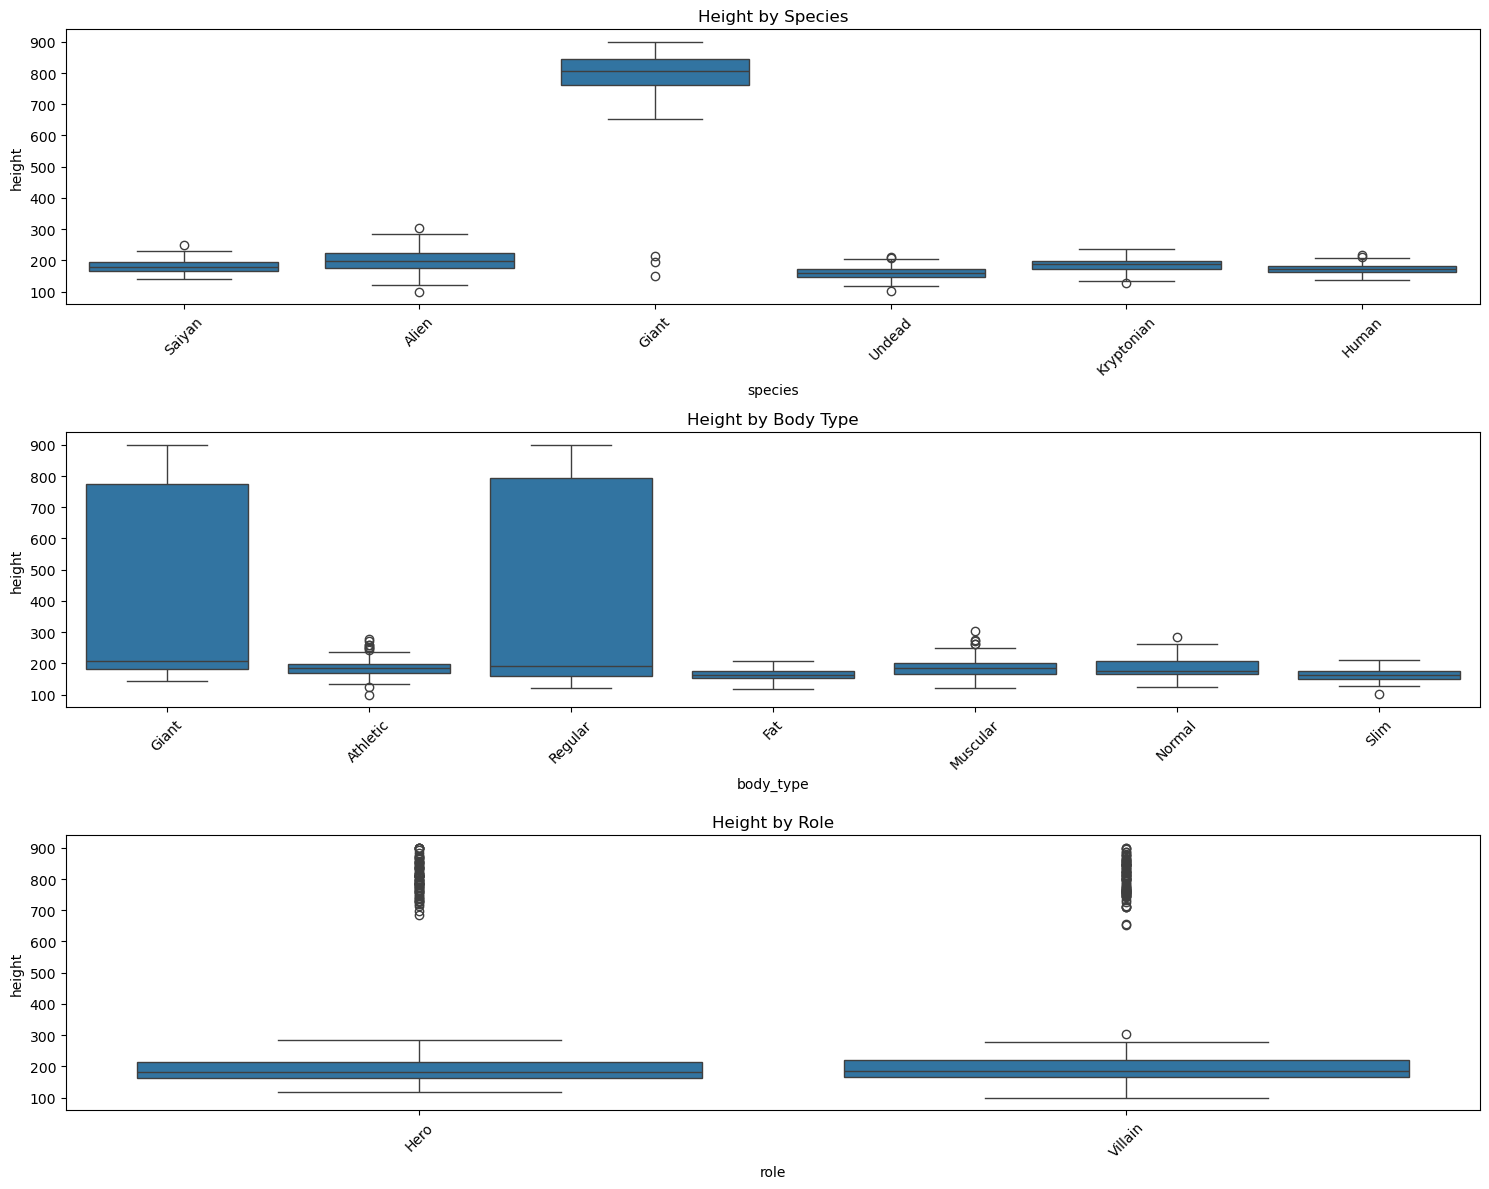

In [74]:
plt.figure(figsize=(15, 12))

# Boxplot by Species
plt.subplot(3, 1, 1)
sns.boxplot(x='species', y='height', data=df)
plt.xticks(rotation=45)
plt.title('Height by Species')

# Boxplot by Body Type
plt.subplot(3, 1, 2)
sns.boxplot(x='body_type', y='height', data=df)
plt.xticks(rotation=45)
plt.title('Height by Body Type')

# Boxplot by Role
plt.subplot(3, 1, 3)
sns.boxplot(x='role', y='height', data=df)
plt.xticks(rotation=45)
plt.title('Height by Role')

plt.tight_layout()
plt.show()

In [75]:
df['height_predict'] = df['height']

# Fill missing values based on 'species' median
for species in df['species'].dropna().unique():
    median_height = df[df['species'] == species]['height'].median()
    df.loc[(df['height_predict'].isnull()) & (df['species'] == species), 'height_predict'] = median_height

# Final check
print("Remaining NaNs in height_predict:", df['height_predict'].isnull().sum())

Remaining NaNs in height_predict: 0


In [76]:
df['height_predict'].describe()

count    1036.000000
mean      284.278958
std       235.098673
min       100.000000
25%       165.000000
50%       184.000000
75%       215.000000
max       900.000000
Name: height_predict, dtype: float64

In [77]:
df['height'].describe()

count    1023.000000
mean      283.183773
std       234.115811
min       100.000000
25%       165.000000
50%       184.000000
75%       215.000000
max       900.000000
Name: height, dtype: float64

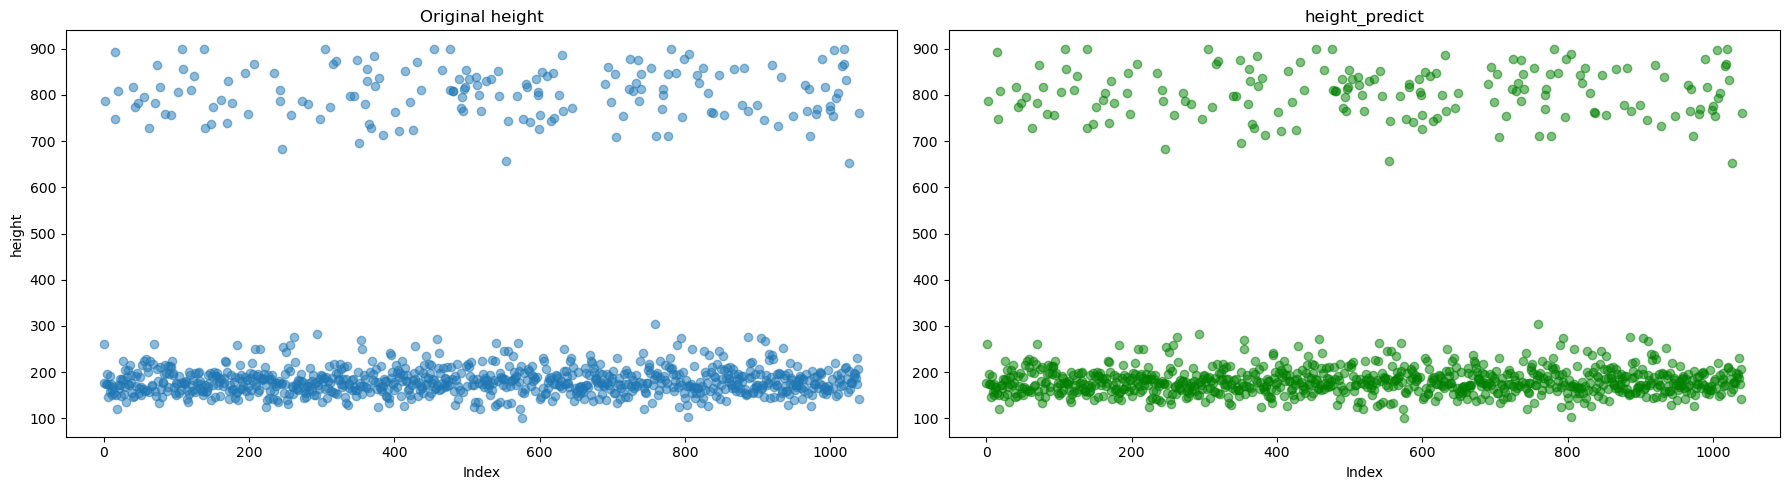

In [78]:
plt.figure(figsize=(18, 5))

# Original
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['height'], alpha=0.5)
plt.title("Original height")
plt.xlabel("Index")
plt.ylabel("height")

# Filled NaN values based on species
plt.subplot(1, 2, 2)
plt.scatter(df.index, df['height_predict'], alpha=0.5, color='green')
plt.title("height_predict")
plt.xlabel("Index")

plt.tight_layout()
plt.show()

In [79]:
df['height'] = df['height_predict']
df.drop(columns=['height_predict'], inplace=True)

## Handling Missing Values of 'Weight'

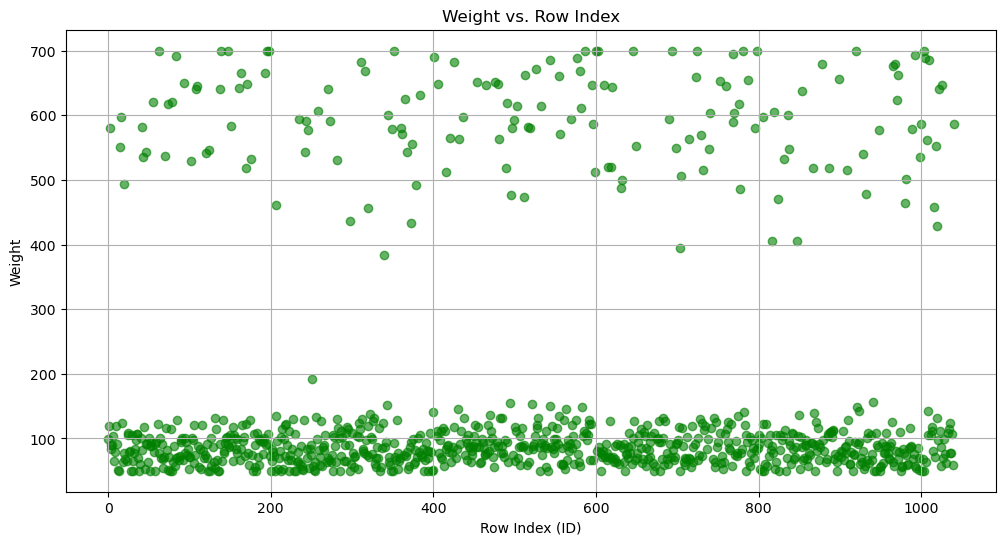

In [81]:
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['weight'], alpha=0.6, color='green')
plt.title('Weight vs. Row Index')
plt.xlabel('Row Index (ID)')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

In [82]:
def analyze_weight_spread_by(group_col):
    grouped = df.groupby(group_col)['weight']
    summary = grouped.agg(['count', 'mean', 'std', 'median', lambda x: x.quantile(0.75) - x.quantile(0.25)])
    summary.columns = ['Count', 'Mean', 'Std Dev', 'Median', 'IQR']
    summary = summary.sort_values(by='IQR')
    return summary

# Try different grouping options
species_spread = analyze_weight_spread_by('species')
body_type_spread = analyze_weight_spread_by('body_type')
role_spread = analyze_weight_spread_by('role')

# Display top 5 for each
print("=== weight spread by Species ===")
display(species_spread.head())

print("\n=== weight spread by Body Type ===")
display(body_type_spread.head())

print("\n=== weight spread by Role ===")
display(role_spread.head())

=== weight spread by Species ===


,Count,Mean,Std Dev,Median,IQR
species,,,,,
Human,152,71.078947,9.454335,71.0,13.00
Undead,159,63.559748,12.112130,61.0,20.00
Saiyan,168,92.119048,19.762909,91.0,24.25
Kryptonian,164,100.115854,18.921017,99.5,26.25
Alien,161,98.155280,26.719740,99.0,35.00



=== weight spread by Body Type ===


,Count,Mean,Std Dev,Median,IQR
body_type,,,,,
Fat,74,65.851351,12.314022,64.0,17.50
Slim,79,65.367089,11.979873,67.0,23.00
Muscular,154,95.389610,23.225890,94.5,26.75
Athletic,192,91.463542,21.304541,90.0,32.00
Normal,66,86.196970,26.284374,77.5,34.75



=== weight spread by Role ===


,Count,Mean,Std Dev,Median,IQR
role,,,,,
Hero,492,166.126016,189.705969,88.0,47.0
Villain,477,174.389937,197.190751,90.0,51.0


In [83]:
df['weight_predict'] = df['weight']

# Fill NaNs in weight_predict using median by species
df['weight_predict'] = df.groupby('species')['weight_predict'].transform(
    lambda x: x.fillna(x.median())
)

In [84]:
df['weight'].describe()

count    969.000000
mean     170.194014
std      193.370757
min       50.000000
25%       70.000000
50%       90.000000
75%      119.000000
max      700.000000
Name: weight, dtype: float64

In [85]:
df['weight_predict'].describe()

count    1036.000000
mean      170.084459
std       193.099852
min        50.000000
25%        70.000000
50%        90.000000
75%       118.000000
max       700.000000
Name: weight_predict, dtype: float64

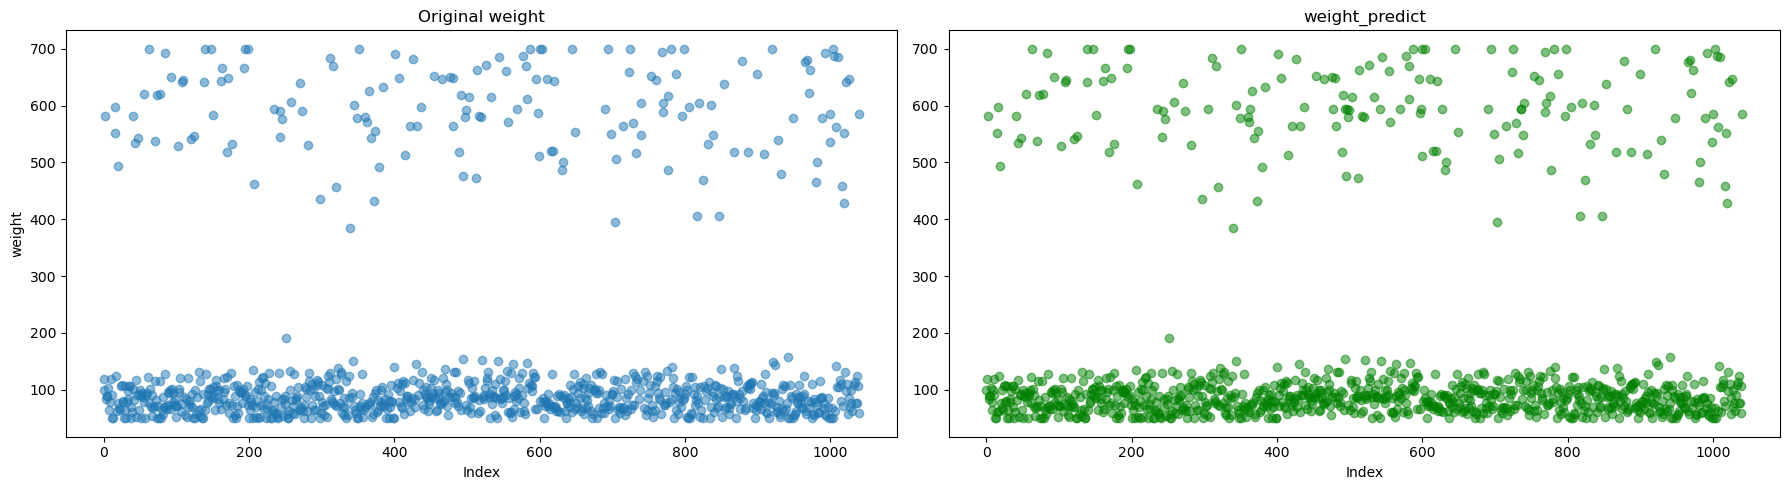

In [86]:
plt.figure(figsize=(18, 5))

# Original
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['weight'], alpha=0.5)
plt.title("Original weight")
plt.xlabel("Index")
plt.ylabel("weight")

# Filled NaN values based on species
plt.subplot(1, 2, 2)
plt.scatter(df.index, df['weight_predict'], alpha=0.5, color='green')
plt.title("weight_predict")
plt.xlabel("Index")

plt.tight_layout()
plt.show()

In [87]:
df['weight'] = df['weight_predict']
df.drop(columns=['weight_predict'], inplace=True)

## Handling missing values of 'power_level'

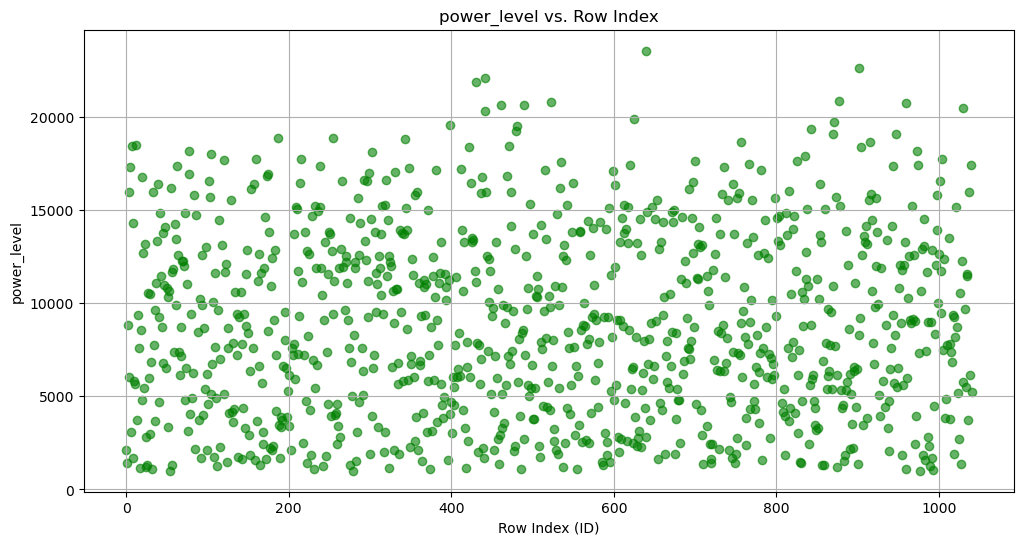

In [89]:
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['power_level'], alpha=0.6, color='green')
plt.title('power_level vs. Row Index')
plt.xlabel('Row Index (ID)')
plt.ylabel('power_level')
plt.grid(True)
plt.show()

<Axes: ylabel='power_level'>

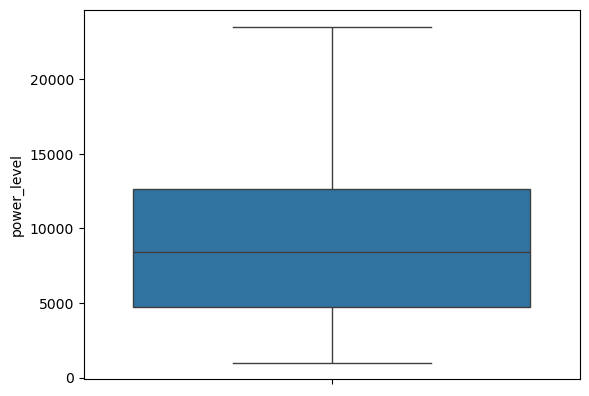

In [90]:
sns.boxplot(df['power_level'])

In [91]:
df['power_level'].describe()

count      977.000000
mean      8860.187308
std       4950.509093
min       1002.000000
25%       4707.000000
50%       8444.000000
75%      12627.000000
max      23533.000000
Name: power_level, dtype: float64

In [92]:
# Calculate the median of the non-missing values in the power_level column
power_level_median = df['power_level'].median()

# Create a new column with missing values filled using the median
df['power_level_predict'] = df['power_level'].fillna(power_level_median)

In [93]:
df['power_level_predict'].describe()

count     1036.000000
mean      8836.485521
std       4808.305698
min       1002.000000
25%       4950.250000
50%       8444.000000
75%      12506.500000
max      23533.000000
Name: power_level_predict, dtype: float64

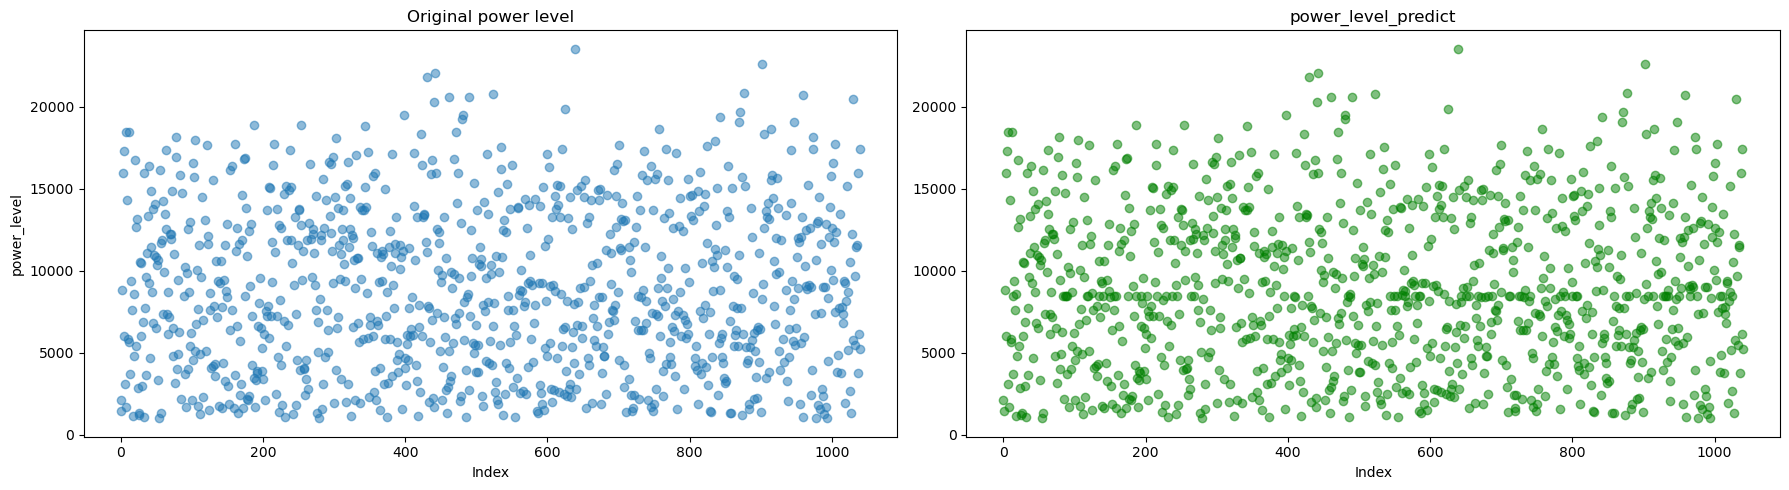

In [94]:
plt.figure(figsize=(18, 5))

# Original
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['power_level'], alpha=0.5)
plt.title("Original power level")
plt.xlabel("Index")
plt.ylabel("power_level")

# Filled NaN values based on species
plt.subplot(1, 2, 2)
plt.scatter(df.index, df['power_level_predict'], alpha=0.5, color='green')
plt.title("power_level_predict")
plt.xlabel("Index")

plt.tight_layout()
plt.show()

In [95]:
df['power_level'] = df['power_level_predict']
df.drop(columns=['power_level_predict'], inplace=True)

## Handling missing values of 'intelligence'

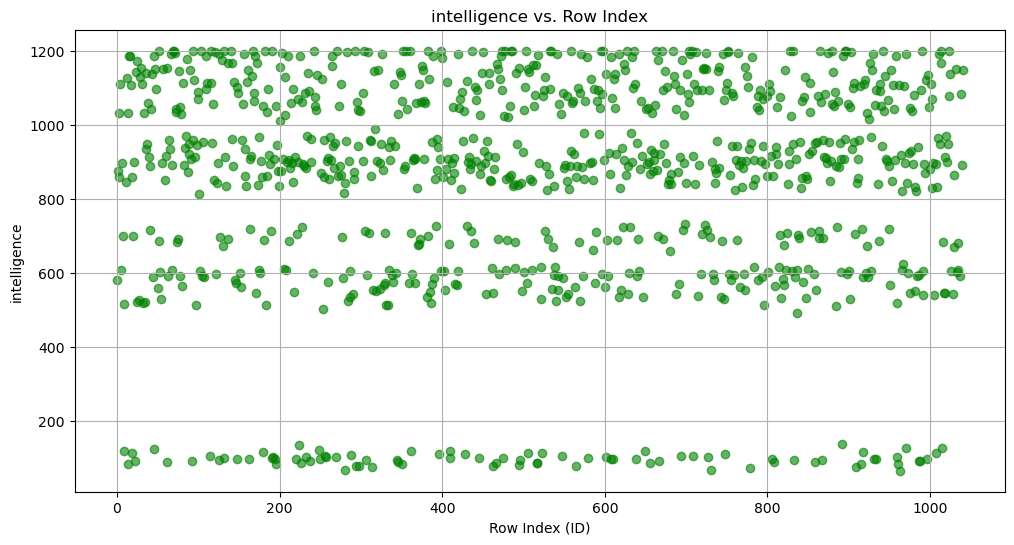

In [97]:
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['intelligence'], alpha=0.6, color='green')
plt.title('intelligence vs. Row Index')
plt.xlabel('Row Index (ID)')
plt.ylabel('intelligence')
plt.grid(True)
plt.show()

<Axes: ylabel='intelligence'>

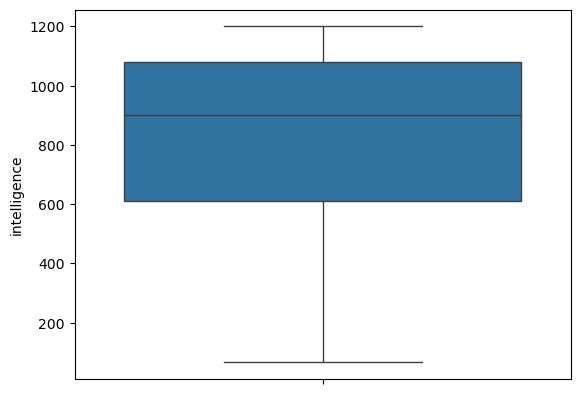

In [98]:
sns.boxplot(df['intelligence'])

In [99]:
df['intelligence'].describe()

count     965.000000
mean      835.147150
std       306.775952
min        66.000000
25%       612.000000
50%       900.000000
75%      1081.000000
max      1200.000000
Name: intelligence, dtype: float64

In [100]:
print(df.corr(numeric_only=True)['intelligence'].sort_values(ascending=False))

intelligence                1.000000
battle_iq                   0.998807
speed                       0.058810
weight                      0.051247
speed_iqr_capped            0.050418
height                      0.049116
win_prob                    0.042993
training_time               0.039483
gender                      0.034610
ranking                     0.024416
training_time_iqr_capped    0.007035
secret_code                 0.005381
power_level                -0.012246
age                        -0.037831
Name: intelligence, dtype: float64


In [101]:
# Prepare the data (rows without NaN in both columns)
mask = df['intelligence'].notna() & df['battle_iq'].notna()
X_train = df.loc[mask, ['battle_iq']]
y_train = df.loc[mask, 'intelligence']

# Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step Predict intelligence where it's missing but battle_iq is available
df['intelligence_predict'] = df['intelligence']  # start with original
missing_mask = df['intelligence'].isna() & df['battle_iq'].notna()
df.loc[missing_mask, 'intelligence_predict'] = model.predict(df.loc[missing_mask, ['battle_iq']])

In [102]:
df['intelligence_predict'].describe()

count    1036.000000
mean      835.010654
std       307.223056
min        66.000000
25%       614.000000
50%       901.000000
75%      1079.500000
max      1207.181924
Name: intelligence_predict, dtype: float64

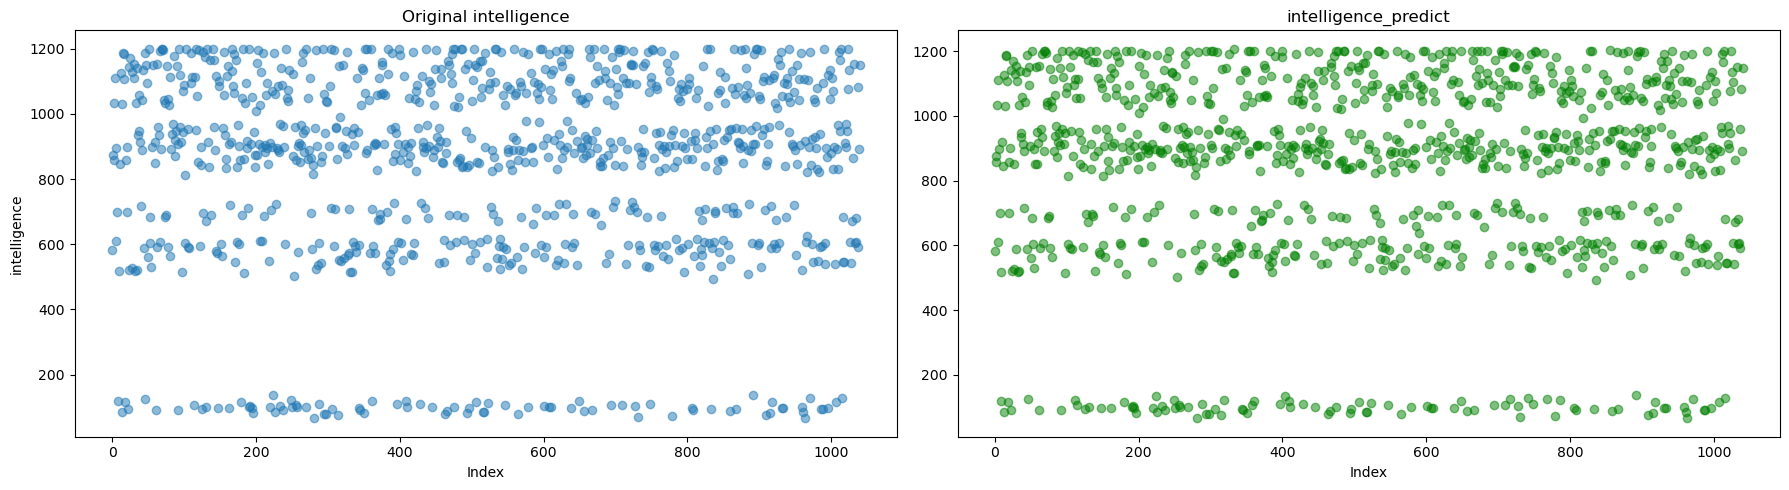

In [103]:
plt.figure(figsize=(18, 5))

# Original
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['intelligence'], alpha=0.5)
plt.title("Original intelligence")
plt.xlabel("Index")
plt.ylabel("intelligence")

# Filled NaN values based on species
plt.subplot(1, 2, 2)
plt.scatter(df.index, df['intelligence_predict'], alpha=0.5, color='green')
plt.title("intelligence_predict")
plt.xlabel("Index")

plt.tight_layout()
plt.show()

In [104]:
df['intelligence'] = df['intelligence_predict']
df.drop(columns=['intelligence_predict'], inplace=True)

## Handling Missing Values in 'gender'

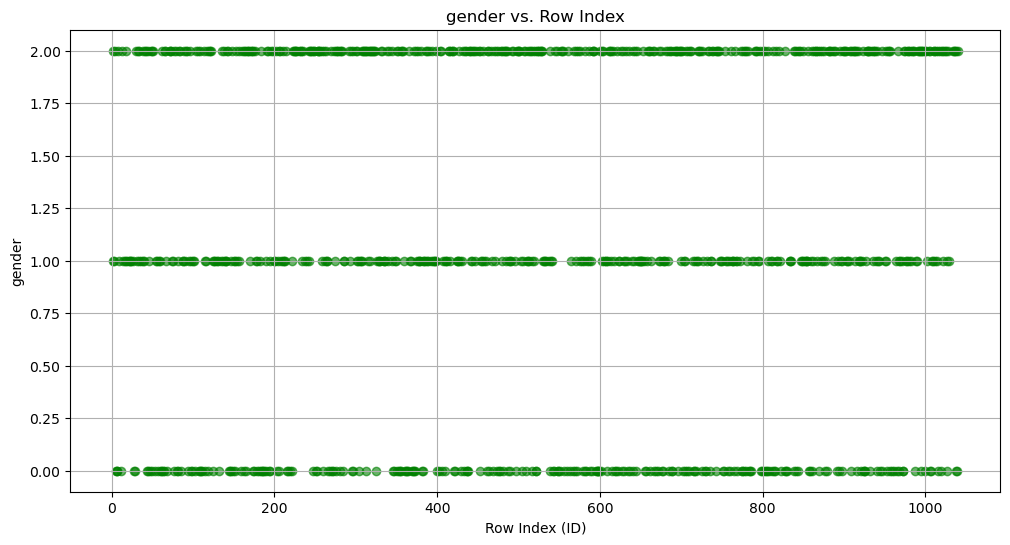

In [106]:
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['gender'], alpha=0.6, color='green')
plt.title('gender vs. Row Index')
plt.xlabel('Row Index (ID)')
plt.ylabel('gender')
plt.grid(True)
plt.show()

In [107]:
# Filter rows where 'height' is missing (NaN)
missing_gender_rows = df[df['gender'].isnull()]
missing_gender_rows

,name,role,skin_type,power_level,weight,height,age,eye_color,gender,hair_color,speed,universe,body_type,job,battle_iq,species,ranking,intelligence,abilities,training_time,special_attack,secret_code,win_prob,speed_iqr_capped,training_time_iqr_capped
0,Manhunter,Hero,Transparent,2140.0,99.0,177.0,121.0,Yellow,NaN,Bald,827.0,Marvel Comics,Giant,Brewer,582.0,Saiyan,3889.0,582.000000,Mind Reading,1353.0,Electric Nova,10111.0,0.43,827.0,1353.0
10,Human Torch,Hero,Luminescent,5840.0,119.0,175.0,121.0,Glowing,NaN,Silver,1042.0,Marvel Comics,Giant,Thief,992.0,Saiyan,1756.0,919.968277,Super Speed,3906.0,Water Gun,NaN,0.55,1042.0,3906.0
13,Trunks,Hero,Draconish,3730.0,50.0,167.0,138.0,White,NaN,Blonde,1220.5,Marvel Comics,Regular,Leader,75.0,Undead,3339.0,84.000000,Mind Reading,2073.0,Grass Surge,10101.0,0.49,1220.5,2073.0
15,Kurama,Hero,Wooden,9376.0,551.0,892.0,121.0,Pink,NaN,Fire-like,1220.5,Marvel,Giant,Saviors,1305.0,Giant,2575.0,1187.000000,Flying,6269.0,Water Vortex,NaN,0.85,1220.5,6269.0
19,Noble Crusader,Hero,Stone,4800.0,493.0,809.0,53.0,Red,NaN,Brown,1904.0,Marvel,Regular,Warrior,909.0,Giant,4258.0,858.000000,Time Manipulation,2032.0,Grass Tempest,10010.0,0.56,1904.0,2032.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,Anomalous Cyber-Demon,Villain,Transparent,9377.0,72.0,173.0,61.0,Yellow,NaN,Bald,1681.0,Cyberverse,Athletic,Mage,545.0,Alien,82.0,545.000000,Super Speed,5752.0,Electric Surge,10111.0,0.59,1681.0,5752.0
1023,The Court of Owls,Villain,Wooden,5170.0,111.0,186.0,77.0,Pink,NaN,Purple,1220.5,Cyberverse,Athletic,Arcanist,1184.0,Kryptonian,3291.0,1077.000000,Time Manipulation,2934.0,Water Vortex,11010.0,0.85,1220.5,2934.0
1030,Ebony Maw,Villain,Metallic,20448.0,62.0,176.0,103.0,Green,NaN,Silver,1020.0,Cyberverse,Regular,Hero,915.0,Human,4707.0,864.000000,Mind Reading,8625.0,Water Fury,10011.0,0.67,1020.0,8625.0
1032,Maxwell Lord,Villain,Stone,9685.0,91.0,197.0,145.0,Red,NaN,Gold,736.0,Cyberverse,Athletic,Assassin,1267.0,Saiyan,4259.0,1152.000000,Super Speed,4968.0,Grass Surge,10010.0,0.64,736.0,4968.0


In [108]:
print(df['gender'].value_counts(dropna=False))

gender
2.0    351
1.0    273
0.0    241
NaN    171
Name: count, dtype: int64


In [109]:
print(df.groupby('species')['gender'].agg(lambda x: x.mode().iloc[0]))
print(df.groupby('body_type')['gender'].agg(lambda x: x.mode().iloc[0]))
print(df.groupby('role')['gender'].agg(lambda x: x.mode().iloc[0]))

species
Alien         2.0
Giant         2.0
Human         1.0
Kryptonian    2.0
Saiyan        2.0
Undead        2.0
Name: gender, dtype: float64
body_type
Athletic    1.0
Fat         2.0
Giant       2.0
Muscular    2.0
Normal      2.0
Regular     2.0
Slim        1.0
Name: gender, dtype: float64
role
Hero       2.0
Villain    2.0
Name: gender, dtype: float64


In [110]:
print(df['species'].value_counts())
print(df['body_type'].value_counts())
print(df['role'].value_counts())

species
Saiyan        179
Kryptonian    179
Giant         176
Undead        171
Alien         170
Human         161
Name: count, dtype: int64
body_type
Giant       249
Athletic    208
Regular     179
Muscular    164
Slim         85
Fat          80
Normal       71
Name: count, dtype: int64
role
Hero       521
Villain    515
Name: count, dtype: int64


Use species as the grouping variable to impute gender.

Why?
- Clear enough mode pattern (e.g., Human = 1.0, others = 2.0)
- Reasonable and consistent group sizes
- Conceptually strong: species likely influences gender in fictional universes

In [112]:
df['gender_predict'] = df['gender']

# Fill NaN in gender_predict using mode of each species group
df['gender_predict'] = df.groupby('species')['gender_predict'].transform(
    lambda x: x.fillna(x.mode().iloc[0])
)

In [113]:
df['gender'] = df['gender_predict']
df.drop(columns=['gender_predict'], inplace=True)

In [114]:
df['gender'] = df['gender'].astype(int)

## Handling missing values of 'secret_code' 

In [116]:
print(df.corr(numeric_only=True)['secret_code'].sort_values(ascending=False))

secret_code                 1.000000
training_time               0.041415
height                      0.035672
weight                      0.034502
age                         0.030210
win_prob                    0.022482
training_time_iqr_capped    0.021576
gender                      0.006072
ranking                     0.005852
battle_iq                   0.005781
intelligence                0.003439
speed_iqr_capped           -0.028650
speed                      -0.030786
power_level                -0.039985
Name: secret_code, dtype: float64


**Dropping the secret_code Column**

The secret_code column contained a large number of missing values (383 NaNs) and exhibited no meaningful correlation with any other variable in the dataset. Additionally, there was no clear interpretation or documented significance of this column within the context of the data.

After confirming that:
- The column is not an identifier or required key for merging,
- It does not contribute to predictive power (based on correlation and feature inspection),
- And its removal does not affect downstream analysis,

The column was deemed uninformative and therefore safely dropped from the dataset to reduce noise and improve data quality.

In [118]:
df = df.drop(columns=['secret_code'])

## Handling the outliers of 'win_prob' 

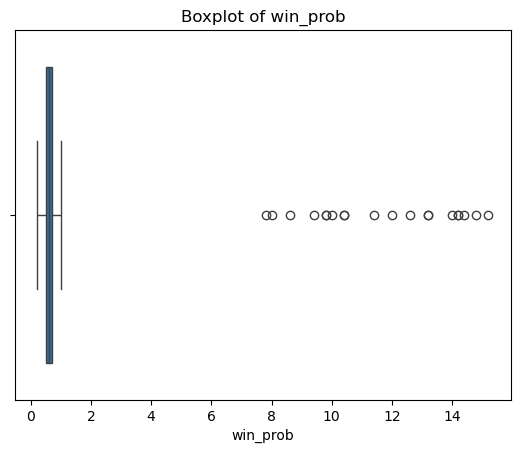

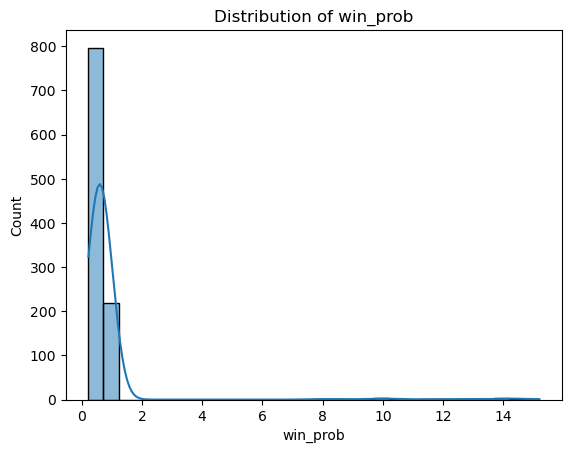

In [120]:
# Boxplot
sns.boxplot(x=df['win_prob'])
plt.title('Boxplot of win_prob')
plt.show()

# Histogram
sns.histplot(df['win_prob'], bins=30, kde=True)
plt.title('Distribution of win_prob')
plt.show()

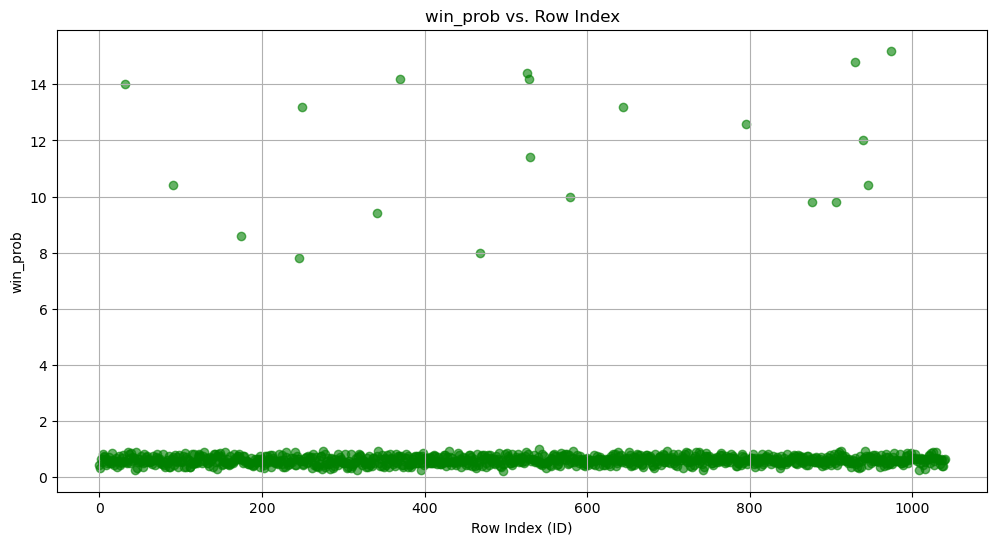

In [121]:
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['win_prob'], alpha=0.6, color='green')
plt.title('win_prob vs. Row Index')
plt.xlabel('Row Index (ID)')
plt.ylabel('win_prob')
plt.grid(True)
plt.show()

In [122]:
Q1 = df['win_prob'].quantile(0.25)
Q3 = df['win_prob'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['win_prob'] < lower_bound) | (df['win_prob'] > upper_bound)]

# Print the number of outliers
print(f"Number of outlier rows in win_prob: {len(outliers)}")

# display the rows
outliers.head()

Number of outlier rows in win_prob: 20


,name,role,skin_type,power_level,weight,height,age,eye_color,gender,hair_color,speed,universe,body_type,job,battle_iq,species,ranking,intelligence,abilities,training_time,special_attack,win_prob,speed_iqr_capped,training_time_iqr_capped
31,Doctor Mid-Nite,Hero,Hairy,6848.0,50.0,136.0,72.0,Blood,1,Purple,1410.0,Marvel,Slim,Arcanist,1219.0,Undead,2324.0,1109.0,Mind Reading,3697.0,Electric Nova,14.0,1410.0,3697.0
90,Brave Templar,Hero,Hairy,3716.0,95.0,196.0,120.0,Blood,1,Gold,847.0,Marvel,Athletic,Saviors,1262.0,Saiyan,2054.0,1148.0,Super Strength,1946.0,Fire Fist,10.4,847.0,1946.0
174,Chivalrous Cleric,Hero,Scaly,16901.0,99.5,171.0,145.0,Blue,2,Green,742.0,DC,Muscular,Captain,620.0,Kryptonian,3002.0,608.0,Teleportation,9410.0,Fire Fist,8.6,742.0,9410.0
246,Senku Ishigami,Hero,Transparent,1782.0,577.0,684.0,114.0,Yellow,2,Purple,1220.5,Anime,Regular,Hero,1248.0,Giant,4737.0,1135.0,Flying,920.0,Fire Fist,7.8,1220.5,920.0
249,Prodigy,Hero,Hairy,11572.0,75.0,174.0,87.0,Blood,2,Blonde,1161.0,Anime,Fat,Mage,112.0,Human,2760.0,122.0,Super Strength,9506.0,Electric Surge,13.2,1161.0,9506.0


In [123]:
# Using IQR method again
Q1 = df['win_prob'].quantile(0.25)
Q3 = df['win_prob'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop outliers in win_prob
df = df[(df['win_prob'] >= lower_bound) & (df['win_prob'] <= upper_bound)]

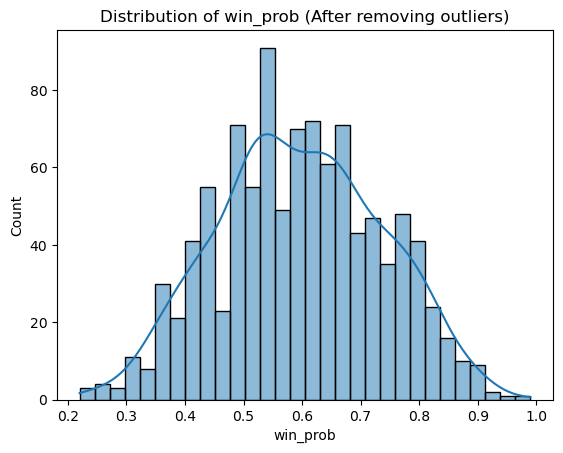

In [124]:
sns.histplot(df['win_prob'], bins=30, kde=True)
plt.title('Distribution of win_prob (After removing outliers)')
plt.show()

In [125]:
df.isnull().sum()

name                        0
role                        0
skin_type                   0
power_level                 0
weight                      0
height                      0
age                         0
eye_color                   0
gender                      0
hair_color                  0
speed                       0
universe                    0
body_type                   0
job                         0
battle_iq                   0
species                     0
ranking                     0
intelligence                0
abilities                   0
training_time               0
special_attack              0
win_prob                    0
speed_iqr_capped            0
training_time_iqr_capped    0
dtype: int64

# 3. Encoding Categorical Variables

In [127]:
df = df.drop(columns=['name'])

#Standardize values in 'universe' before encoding
df['universe'] = df['universe'].replace({
    'DC Comics': 'DC',
    'Marvel Comics': 'Marvel'
})

# One-hot encode categorical columns with small to moderate cardinality
one_hot_cols = ['role', 'special_attack', 'species', 'body_type', 'skin_type', 'universe', 'abilities']
df = pd.get_dummies(df, columns=one_hot_cols, prefix=one_hot_cols)

# Frequency encode moderate-to-high cardinality columns
freq_encode_cols = ['job', 'hair_color', 'eye_color']
for col in freq_encode_cols:
    freq_map = df[col].value_counts(normalize=True)
    df[col] = df[col].map(freq_map)

print("Final encoding complete. DataFrame shape:", df.shape)

# Convert all boolean columns to integers
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

print("Boolean columns converted to integers.")

Final encoding complete. DataFrame shape: (1016, 64)
Boolean columns converted to integers.


In [128]:
df.head()

,power_level,weight,height,age,eye_color,gender,hair_color,speed,job,battle_iq,ranking,intelligence,training_time,win_prob,speed_iqr_capped,training_time_iqr_capped,role_Hero,role_Villain,special_attack_Electric Nova,special_attack_Electric Storm,special_attack_Electric Surge,special_attack_Eternal Firewave,special_attack_Fire Fist,special_attack_Fireburst Cannon,special_attack_Grass Surge,special_attack_Grass Tempest,special_attack_Grass blade,special_attack_Water Fury,special_attack_Water Gun,special_attack_Water Vortex,species_Alien,species_Giant,species_Human,species_Kryptonian,species_Saiyan,species_Undead,body_type_Athletic,body_type_Fat,body_type_Giant,body_type_Muscular,body_type_Normal,body_type_Regular,body_type_Slim,skin_type_Draconish,skin_type_Hairy,skin_type_Luminescent,skin_type_Metallic,skin_type_Normal,skin_type_Scaly,skin_type_Steel,skin_type_Stone,skin_type_Transparent,skin_type_Wooden,universe_Anime,universe_Cyberverse,universe_DC,universe_Fantasy Realm,universe_Marvel,abilities_Flying,abilities_Mind Reading,abilities_Super Speed,abilities_Super Strength,abilities_Teleportation,abilities_Time Manipulation
0,2140.0,99.0,177.0,121.0,0.100394,2,0.085630,827.0,0.069882,582.0,3889.0,582.0,1353.0,0.43,827.0,1353.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
1,1437.0,119.0,260.0,94.0,0.100394,1,0.088583,1151.0,0.070866,927.0,3003.0,875.0,767.0,0.32,1151.0,767.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,8843.0,581.0,788.0,118.0,0.100394,2,0.088583,870.0,0.083661,909.0,4829.0,858.0,3895.0,0.63,870.0,3895.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,15966.0,83.0,175.0,91.0,0.101378,1,0.094488,1220.5,0.072835,1136.0,1517.0,1033.0,8874.0,0.52,1220.5,8874.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,6039.0,90.0,195.0,22.0,0.091535,2,0.087598,1220.5,0.061024,1222.0,3602.0,1111.0,3454.0,0.80,1220.5,3454.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


# 4. Normalize / Scale Numerical Features

From earlier stats and histograms:
- Many features (e.g., power_level, training_time) have outliers or skew.
- So, use RobustScaler — it's designed to handle this.

In [131]:
# Filtering out one-hot encoded columns (which start with known prefixes)
original_numerical_cols = ['power_level', 'weight', 'height', 'age', 'battle_iq','ranking', 'intelligence', 'win_prob','speed_iqr_capped', 'training_time_iqr_capped']

# Create a copy for scaling
df_scaled = df.copy()

# Initialize RobustScaler and fit-transform
scaler = RobustScaler()
df_scaled[original_numerical_cols] = scaler.fit_transform(df_scaled[original_numerical_cols])

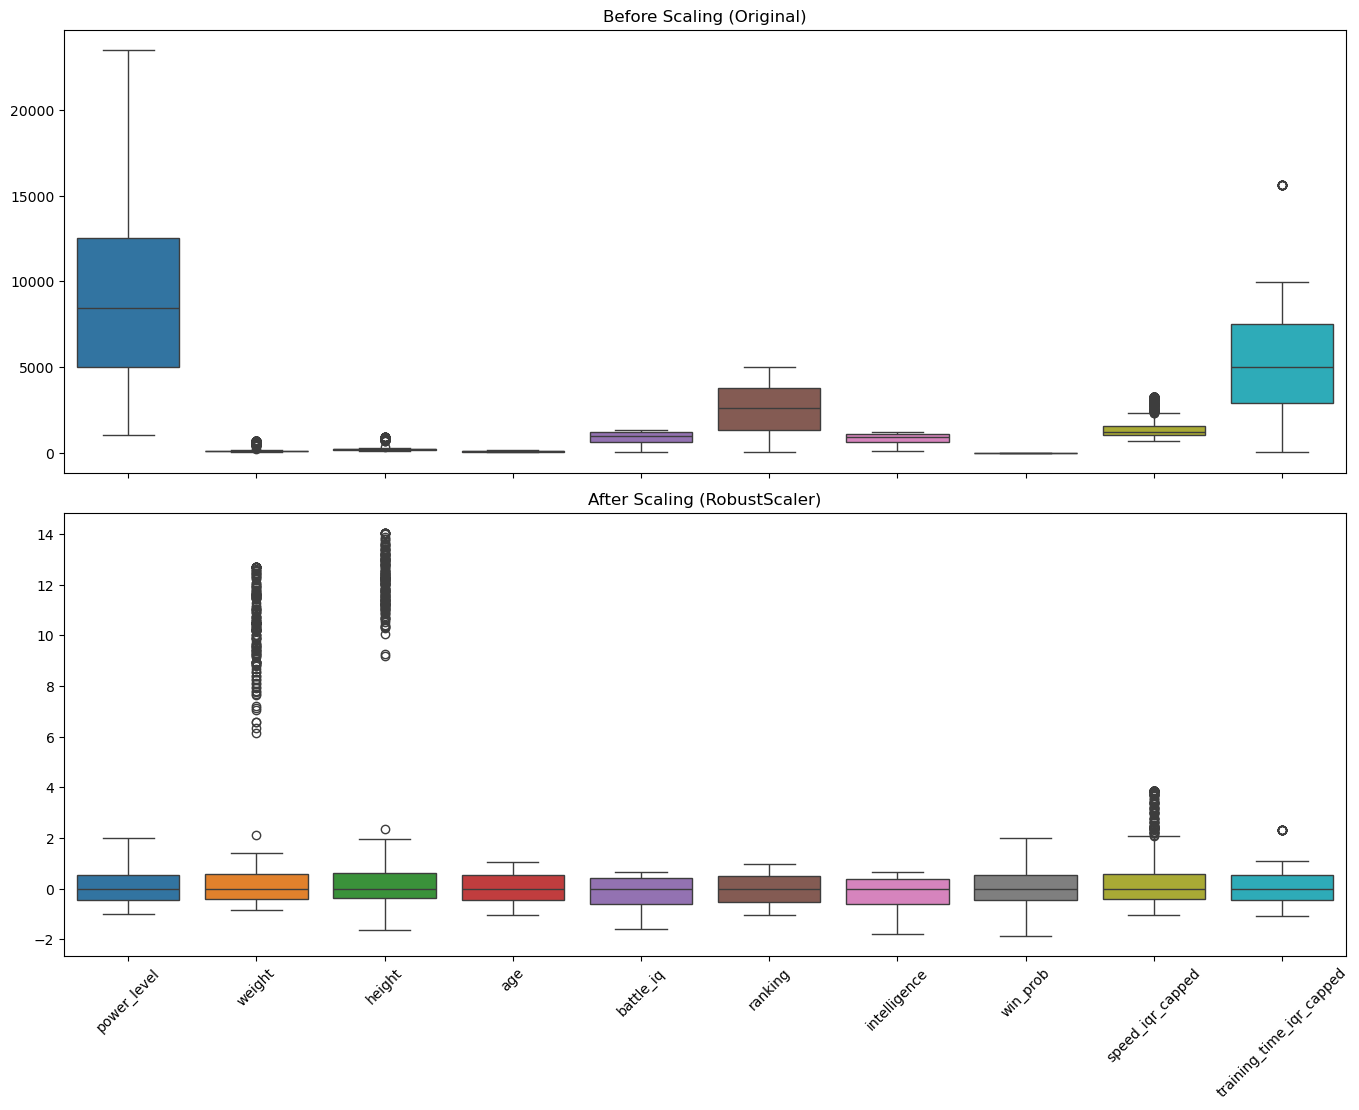

In [132]:
# Visualization: Before and After
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# Before scaling
sns.boxplot(data=df[original_numerical_cols], ax=axes[0])
axes[0].set_title("Before Scaling (Original)")

# After scaling
sns.boxplot(data=df_scaled[original_numerical_cols], ax=axes[1])
axes[1].set_title("After Scaling (RobustScaler)")

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# 4. Model Building and Evaluation

## Trying Random Forest

**Model Building**

In [135]:
# Define the feature set and target
X = df.drop(columns=['win_prob', 'speed', 'training_time'])  # Exclude original unscaled versions
y = df['win_prob']

In [136]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [137]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Evaluate the Model**

In [139]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random forest - RMSE: {rmse:.2f}")
print(f"Random forest - R² Score: {r2:.4f}")

Random forest - RMSE: 0.07
Random forest - R² Score: 0.7508


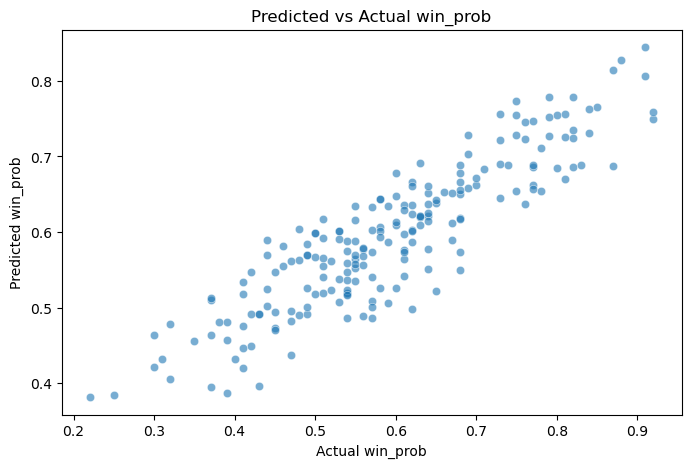

In [140]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual win_prob")
plt.ylabel("Predicted win_prob")
plt.title("Predicted vs Actual win_prob")
plt.show()

## Trying Linear Regression

**Model Building**

In [142]:
# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

**Evaluate the model**

In [144]:
rmse_lr = root_mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - RMSE: {rmse_lr:.4f}")
print(f"Linear Regression - R² Score: {r2_lr:.4f}")

Linear Regression - RMSE: 0.0711
Linear Regression - R² Score: 0.9476


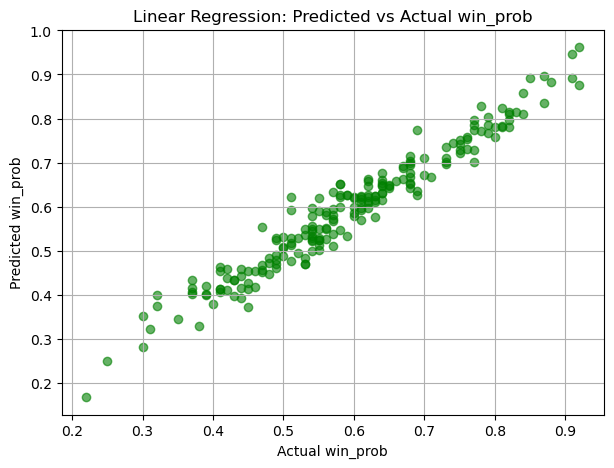

In [145]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='green')
plt.xlabel('Actual win_prob')
plt.ylabel('Predicted win_prob')
plt.title('Linear Regression: Predicted vs Actual win_prob')
plt.grid(True)
plt.show()


## Trying XGBoost

**Model Building**

In [148]:
# Initialize XGBoost regressor
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    objective='reg:squarederror'  # For regression
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

**Evaluate the model**

In [150]:
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - RMSE: {rmse_xgb:.4f}")
print(f"XGBoost - R² Score: {r2_xgb:.4f}")

XGBoost - RMSE: 0.0394
XGBoost - R² Score: 0.9234


## Selecting the model

Choose XGBoost because;
- Lower RMSE
- Moderate R² Score 

## Cross validating 

In [154]:
# K-Fold setup 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scorers
r2 = cross_val_score(xgb_model, X, y, scoring='r2', cv=kfold)
rmse = cross_val_score(
    xgb_model,
    X, y,
    scoring=make_scorer(root_mean_squared_error),
    cv=kfold
)

# Results
print(f"Cross-validated R² scores: {r2}")
print(f"Mean R²: {r2.mean():.4f}")

print(f"Cross-validated RMSE scores: {rmse}")
print(f"Mean RMSE: {rmse.mean():.4f}")

Cross-validated R² scores: [0.92338294 0.90222227 0.92454472 0.90261748 0.92241289]
Mean R²: 0.9150
Cross-validated RMSE scores: [0.03942697 0.04167177 0.03995177 0.04512065 0.03655837]
Mean RMSE: 0.0405


### Interpretation of Results

- Cross-validated R² scores:
[0.923, 0.902, 0.925, 0.903, 0.922]
➤ Mean R²: 0.9150 — This is very strong. It means ~91.5% of the variance in win_prob is explained by the model.

- Cross-validated RMSE scores:
[0.0394, 0.0417, 0.0400, 0.0451, 0.0366]
➤ Mean RMSE: 0.0405 — This is low, indicating accurate predictions (error around ±0.04 units on the win_prob scale).

These values confirm the XGBoost model is robust and generalizes well across different splits.

# Feature Importance

In [157]:
# Train the model
model = XGBRegressor()
model.fit(X, y)

# Get feature importances and feature names
importances = model.feature_importances_
feature_names = X.columns

# Put into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display
top_n = 25
top_features = feature_importance_df.head(top_n)

# Display table
print(top_features.to_string(index=False))

                        Feature  Importance
               skin_type_Normal    0.154116
                skin_type_Hairy    0.133275
      special_attack_Water Fury    0.064282
                skin_type_Scaly    0.062968
special_attack_Fireburst Cannon    0.061646
       special_attack_Fire Fist    0.060688
       special_attack_Water Gun    0.060428
            skin_type_Draconish    0.059157
special_attack_Eternal Firewave    0.052629
                      eye_color    0.048751
             skin_type_Metallic    0.040256
    special_attack_Water Vortex    0.039549
                            age    0.027938
          skin_type_Transparent    0.020093
                         gender    0.017890
                      battle_iq    0.012246
                      role_Hero    0.011796
                    power_level    0.009913
       training_time_iqr_capped    0.009465
                   intelligence    0.006383
          skin_type_Luminescent    0.004376
                skin_type_Stone 

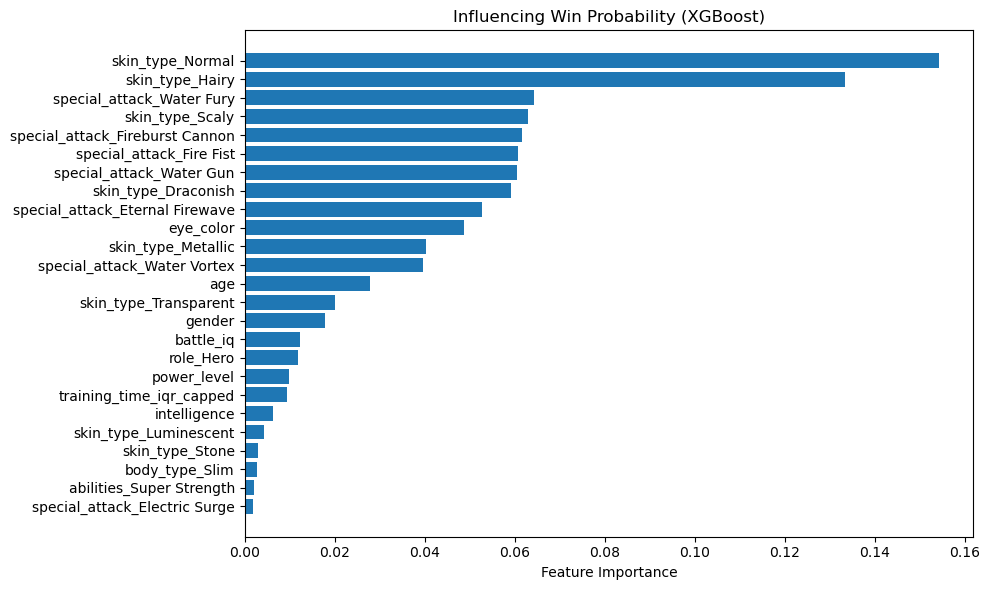

In [158]:
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1])
plt.xlabel("Feature Importance")
plt.title("Influencing Win Probability (XGBoost)")
plt.tight_layout()
plt.show()

# Task 2

In [160]:
# Copy of the original dataframe
train_df = df.copy()

# Reuse the IQR capping function from earlier
def iqr_capping(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

# Feature engineering
train_df['speed_iqr_capped'] = iqr_capping(train_df['speed'])
train_df['training_iqr_capped'] = iqr_capping(train_df['training_time'])
train_df = train_df.drop(columns=['speed', 'training_time'])

# Drop target from input
X = train_df.drop(columns='win_prob')
y = train_df['win_prob']

# Automatically get columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# Define preprocessing and pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# Train the model
model_pipeline.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('num', StandardScaler(),
                                                  ['power_level', 'weight',
                                                   'height', 'age', 'eye_color',
                                                   'gender', 'hair_color',
                                                   'job', 'battle_iq',
                                                   'ranking', 'intelligence',
                                                   'speed_iqr_capped',
                                                   'training_time_iqr_capped',
                                                   'role_Hero', 'role_Villain',
                                                   'special_attack_Electri...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [161]:
task_df = pd.read_csv("Task2_superheroes_villains.csv")

# Apply IQR capping to engineered features
task_df['speed_iqr_capped'] = iqr_capping(task_df['speed'])
task_df['training_iqr_capped'] = iqr_capping(task_df['training_time'])

# Drop unused columns 
task_df = task_df.drop(columns=['speed', 'training_time', 'secret_code'])  

# apply OneHotEncoding to match training columns
task_df_encoded = pd.get_dummies(task_df)

# Align columns with training data
# `X.columns` is the training data column order
task_df_encoded_aligned = task_df_encoded.reindex(columns=X.columns, fill_value=0)

# Make predictions
predictions = model_pipeline.predict(task_df_encoded_aligned)

# Add predictions to original DataFrame
task_df['predicted_win_prob'] = predictions

# View results
print(task_df[['name', 'predicted_win_prob']])

              name  predicted_win_prob
0         Endeavor            0.706178
1  Captain Britain            0.762525
2    Golden Glider            0.555721
3         Overhaul            0.584728
4     Madame Hydra            0.472834
5       King Shark            0.634002


In [162]:
task_df['name'] = task_df['name'].str.strip()  # In case of extra spaces
matchups = [
    ('Endeavor', 'Overhaul'),
    ('Captain Britain', 'Madame Hydra'),
    ('Golden Glider', 'King Shark')
]

# Go through each match
for hero1, hero2 in matchups:
    win_prob_1 = task_df.loc[task_df['name'] == hero1, 'predicted_win_prob'].values[0]
    win_prob_2 = task_df.loc[task_df['name'] == hero2, 'predicted_win_prob'].values[0]
    
    winner = hero1 if win_prob_1 > win_prob_2 else hero2
    print(f"{hero1} vs {hero2} -> Winner: {winner} (Win Prob: {max(win_prob_1, win_prob_2):.2f})")

Endeavor vs Overhaul -> Winner: Endeavor (Win Prob: 0.71)
Captain Britain vs Madame Hydra -> Winner: Captain Britain (Win Prob: 0.76)
Golden Glider vs King Shark -> Winner: King Shark (Win Prob: 0.63)


# Task 3

In [280]:
task_df3 = pd.read_csv("Task3_villains.csv")

task_df3['speed_iqr_capped'] = iqr_capping(task_df3['speed'])
task_df3['training_iqr_capped'] = iqr_capping(task_df3['training_time'])

task_df3 = task_df3.drop(columns=['speed', 'training_time', 'secret_code'])  

task_df3_encoded = pd.get_dummies(task_df3)

task_df3_encoded_aligned = task_df3_encoded.reindex(columns=X.columns, fill_value=0)

predictions = model_pipeline.predict(task_df3_encoded_aligned)

task_df3['predicted_win_prob'] = predictions

print(task_df3[['name', 'predicted_win_prob']])

      name  predicted_win_prob
0  Penguin            0.888389
